In [1]:
import pandas as pd


data = pd.read_csv('clean_air.csv')

# Display the first few rows of the DataFrame
data.head(10)

,City,Year,Month,Day,Seasonality,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0,2015,1,1,0,82.6825,116.272721,0.920000,18.22,17.15,23.483476,0.920000,27.64,133.36,0.00,0.02,0.00,350.333333,0
1,0,2015,1,2,0,82.6825,116.272721,0.970000,15.69,16.46,23.483476,0.970000,24.55,34.06,3.68,5.50,3.77,350.333333,0
2,0,2015,1,3,0,82.6825,116.272721,17.400000,19.30,29.70,23.483476,17.400000,29.07,30.70,6.80,16.40,2.25,350.333333,0
3,0,2015,1,4,0,82.6825,116.272721,1.700000,18.48,17.97,23.483476,1.700000,18.59,36.08,4.43,10.14,1.00,350.333333,0
4,0,2015,1,5,0,82.6825,116.272721,22.100000,21.42,37.76,23.483476,22.100000,39.33,39.31,7.01,18.89,2.78,350.333333,0
5,0,2015,1,6,0,82.6825,116.272721,45.410000,38.48,81.50,23.483476,45.410000,45.76,46.51,5.42,10.83,1.93,350.333333,0
6,0,2015,1,7,0,82.6825,116.272721,112.160000,40.62,130.77,23.483476,112.160000,32.28,33.47,0.00,0.00,0.00,350.333333,0
7,0,2015,1,8,0,82.6825,116.272721,80.870000,36.74,96.75,23.483476,80.870000,38.54,31.89,0.00,0.00,0.00,350.333333,0
8,0,2015,1,9,0,82.6825,116.272721,29.160000,31.00,48.00,23.483476,29.160000,58.68,25.75,0.00,0.00,0.00,350.333333,0
9,0,2015,1,10,0,82.6825,116.272721,23.097333,7.04,0.00,23.483476,23.097333,8.29,4.55,0.00,0.00,0.00,350.333333,0


In [2]:
data_hour = pd.read_csv('clean_air_hour.csv')
data_hour.head(10)

,City,Year,Month,Day,Hour,Times_Of_Day,Seasonality,PM2.5,PM10,NO,...,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,0,2015,1,1,1,0,0,90.747917,112.842721,1.00,...,36.37,23.607959,1.00,122.07,45.043974,0.0,0.0,0.0,480.638889,0
1,0,2015,1,1,2,0,0,90.747917,112.842721,0.02,...,19.73,23.607959,0.02,85.90,45.043974,0.0,0.0,0.0,480.638889,0
2,0,2015,1,1,3,0,0,90.747917,112.842721,0.08,...,11.08,23.607959,0.08,52.83,45.043974,0.0,0.0,0.0,480.638889,0
3,0,2015,1,1,4,0,0,90.747917,112.842721,0.30,...,9.20,23.607959,0.30,39.53,153.580000,0.0,0.0,0.0,480.638889,0
4,0,2015,1,1,5,0,0,90.747917,112.842721,0.12,...,7.85,23.607959,0.12,32.63,45.043974,0.0,0.0,0.0,480.638889,0
5,0,2015,1,1,6,1,0,67.543333,112.842721,0.33,...,10.82,23.607959,0.33,29.87,64.250000,0.0,0.0,0.0,287.000000,1
6,0,2015,1,1,7,1,0,67.543333,112.842721,0.45,...,12.47,23.607959,0.45,27.41,191.960000,0.0,0.0,0.0,287.000000,1
7,0,2015,1,1,8,2,0,84.992500,112.842721,1.03,...,16.48,23.607959,1.03,20.92,177.210000,0.0,0.0,0.0,228.272727,1
8,0,2015,1,1,9,2,0,84.992500,112.842721,1.47,...,18.02,23.607959,1.47,16.45,122.080000,0.0,0.0,0.0,228.272727,1
9,0,2015,1,1,10,2,0,84.992500,112.842721,2.05,...,16.08,23.607959,2.05,15.14,36.932793,0.0,0.0,0.0,228.272727,1


In [3]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv('clean_air.csv')

# Assuming the target variable 'AQI_Bucket' is categorical and all other necessary preprocessing has been done

# Separate the features and the target
X = df.drop(['AQI', 'AQI_Bucket'], axis=1)  # Drop 'AQI' as per your request
y = df['AQI_Bucket']

# ANOVA F-test feature selection
selector = SelectKBest(f_classif, k='all')
X_new = selector.fit_transform(X, y)
df_scores = pd.DataFrame(selector.scores_, index=X.columns, columns=['F_Scores'])
df_pvalues = pd.DataFrame(selector.pvalues_, index=X.columns, columns=['P_Values'])

# Feature importance from a Random Forest Classifier with reduced number of trees
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(X, y)
df_importances = pd.DataFrame(model.feature_importances_, index=X.columns, columns=['Importance']).sort_values('Importance', ascending=False)

# Combine ANOVA F-test results with Random Forest feature importances
combined_features = df_scores.join(df_pvalues).join(df_importances)
combined_features = combined_features.sort_values(by='Importance', ascending=False)  # Sort by importance

# Scale features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA for dimensionality reduction
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X_scaled)
pca_components = pd.DataFrame(pca.components_, columns=X.columns)

# Get the absolute correlation matrix
corr_matrix = df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop features 
X_reduced = X.drop(df[to_drop], axis=1)

# Final DataFrame with selected features
final_features = combined_features.loc[X_reduced.columns]

# Print the final selected features
print(final_features)

sorted_features = combined_features.sort_values(by=['F_Scores', 'P_Values'], ascending=[False, True])

sorted_features

                F_Scores       P_Values  Importance
City          217.624651  1.335339e-228    0.025623
Year          511.830879   0.000000e+00    0.023576
Month          42.978322   2.743983e-44    0.018990
Day             2.667942   2.041514e-02    0.024578
Seasonality   233.274804  6.780665e-245    0.012019
PM2.5        6752.133070   0.000000e+00    0.256332
PM10         3652.051058   0.000000e+00    0.176499
NO           1018.362870   0.000000e+00    0.046487
NO2          1897.656065   0.000000e+00    0.046748
NOx          1210.943865   0.000000e+00    0.041208
NH3           177.319836  1.882239e-186    0.039499
CO           2834.236856   0.000000e+00    0.104179
SO2           977.027603   0.000000e+00    0.045688
O3            431.913901   0.000000e+00    0.053132
Benzene         9.990069   1.446681e-09    0.029721
Toluene       412.606686   0.000000e+00    0.032857
Xylene         62.133753   1.172252e-64    0.022864


,F_Scores,P_Values,Importance
PM2.5,6752.133070,0.000000e+00,0.256332
PM10,3652.051058,0.000000e+00,0.176499
CO,2834.236856,0.000000e+00,0.104179
NO2,1897.656065,0.000000e+00,0.046748
NOx,1210.943865,0.000000e+00,0.041208
NO,1018.362870,0.000000e+00,0.046487
SO2,977.027603,0.000000e+00,0.045688
Year,511.830879,0.000000e+00,0.023576
O3,431.913901,0.000000e+00,0.053132
Toluene,412.606686,0.000000e+00,0.032857


In [6]:
from sklearn.model_selection import train_test_split
# Selecting the features and target for regression
# Dropping the 'AQI' column because it's a direct representation of the 'AQI_Bucket'
features = data.drop(columns=['AQI', 'AQI_Bucket', 'Year', 'O3', 'Toluene', 'Seasonality', 'City', 'NH3', 'Xylene', 'Month', 'Benzene', 'Day'])
target = data['AQI']
print(features)
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Checking the shape of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


         PM2.5        PM10     NO    NO2    NOx     CO    SO2
0      82.6825  116.272721   0.92  18.22  17.15   0.92  27.64
1      82.6825  116.272721   0.97  15.69  16.46   0.97  24.55
2      82.6825  116.272721  17.40  19.30  29.70  17.40  29.07
3      82.6825  116.272721   1.70  18.48  17.97   1.70  18.59
4      82.6825  116.272721  22.10  21.42  37.76  22.10  39.33
...        ...         ...    ...    ...    ...    ...    ...
28152  15.0200   50.940000   7.68  25.06  19.54   0.47   8.55
28153  24.3800   74.090000   3.42  26.06  16.53   0.52  12.72
28154  22.9100   65.730000   3.45  29.53  18.33   0.48   8.42
28155  16.6400   49.970000   4.05  29.26  18.80   0.52   9.84
28156  15.0000   66.000000   0.40  26.85  14.05   0.59   2.10

[28157 rows x 7 columns]


((22525, 7), (5632, 7), (22525,), (5632,))

In [7]:
features

,PM2.5,PM10,NO,NO2,NOx,CO,SO2
0,82.6825,116.272721,0.92,18.22,17.15,0.92,27.64
1,82.6825,116.272721,0.97,15.69,16.46,0.97,24.55
2,82.6825,116.272721,17.40,19.30,29.70,17.40,29.07
3,82.6825,116.272721,1.70,18.48,17.97,1.70,18.59
4,82.6825,116.272721,22.10,21.42,37.76,22.10,39.33
...,...,...,...,...,...,...,...
28152,15.0200,50.940000,7.68,25.06,19.54,0.47,8.55
28153,24.3800,74.090000,3.42,26.06,16.53,0.52,12.72
28154,22.9100,65.730000,3.45,29.53,18.33,0.48,8.42
28155,16.6400,49.970000,4.05,29.26,18.80,0.52,9.84


In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Linear Regression model
linear_reg = LinearRegression()

# Fit the model to the training data
linear_reg.fit(X_train, y_train)

# Predicting the target on the training and testing data
y_train_pred = linear_reg.predict(X_train)
y_test_pred = linear_reg.predict(X_test)

# Calculating the performance metrics for the training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculating the performance metrics for the testing set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

(train_mse, train_r2), (test_mse, test_r2)


((3557.8196779886466, 0.8112370160052313),
 (3759.8514628606704, 0.8050621607177213))

In [9]:
X_train

,PM2.5,PM10,NO,NO2,NOx,CO,SO2
26643,18.850000,37.620000,5.440000,8.860000,12.090000,0.47,5.79
4418,56.360000,182.160000,16.270000,38.070000,6.790000,0.52,6.24
28033,46.600000,117.110000,2.730000,41.140000,23.690000,1.05,5.74
4226,46.240000,208.970000,3.140000,17.790000,10.680000,1.19,3.17
1862,31.260000,72.820000,2.600000,10.780000,7.920000,0.40,7.70
...,...,...,...,...,...,...,...
21575,34.858085,94.764770,37.525886,24.973562,48.157951,0.00,98.74
5390,22.010000,56.080000,6.470000,18.540000,21.240000,0.62,8.99
860,51.780000,116.272721,28.690000,45.290000,43.510000,28.69,61.88
15795,20.200000,68.790000,7.270000,19.500000,14.290000,0.32,9.69


In [10]:
linear_reg.coef_[0], linear_reg.intercept_


(0.9567094009867796, 18.099373850991498)

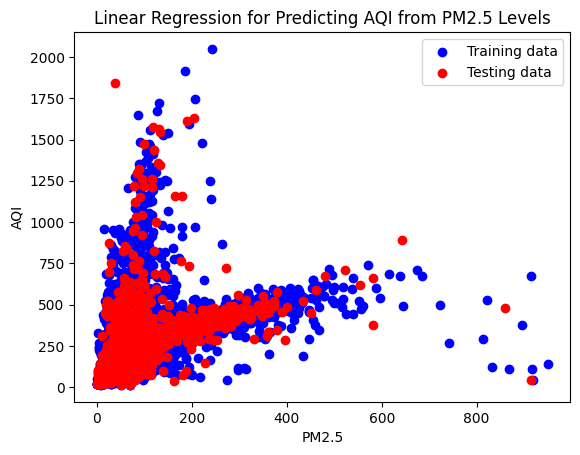

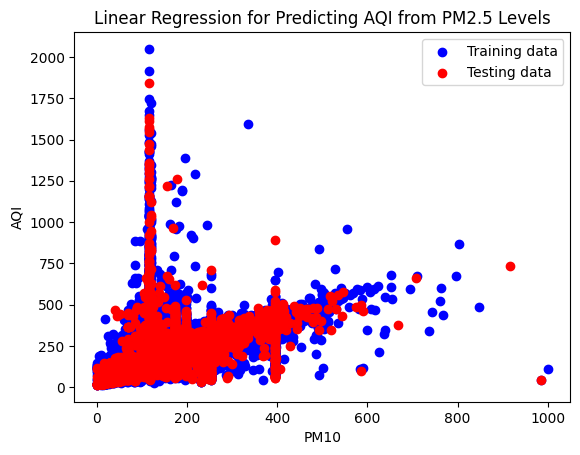

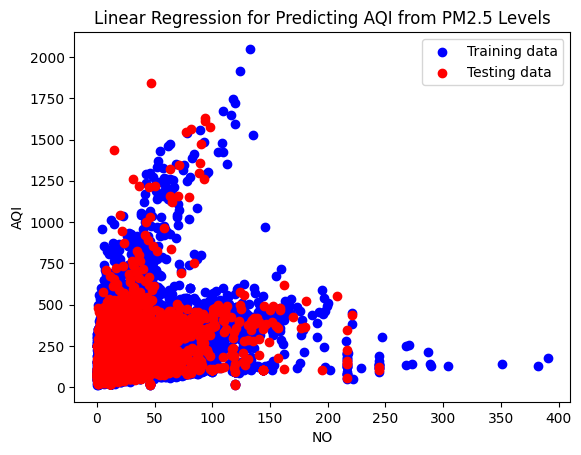

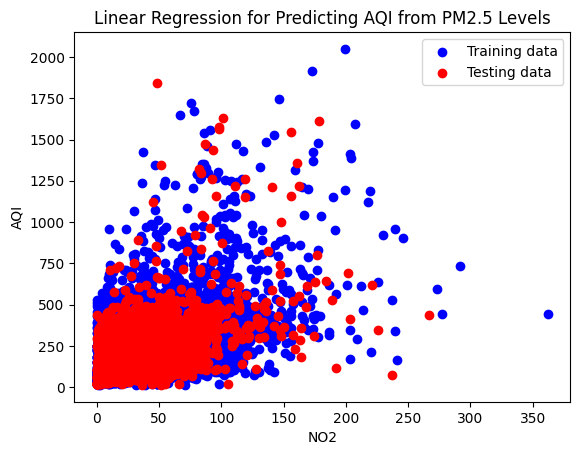

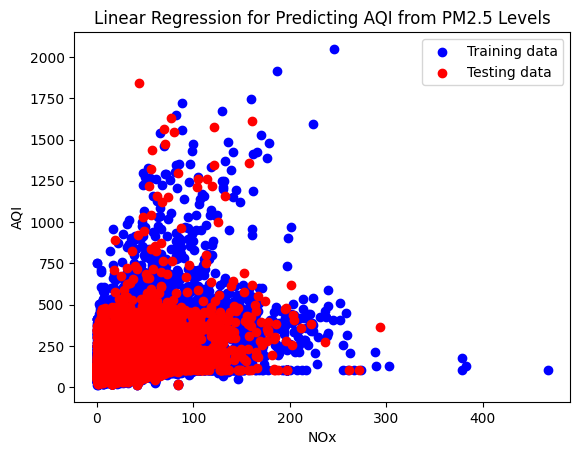

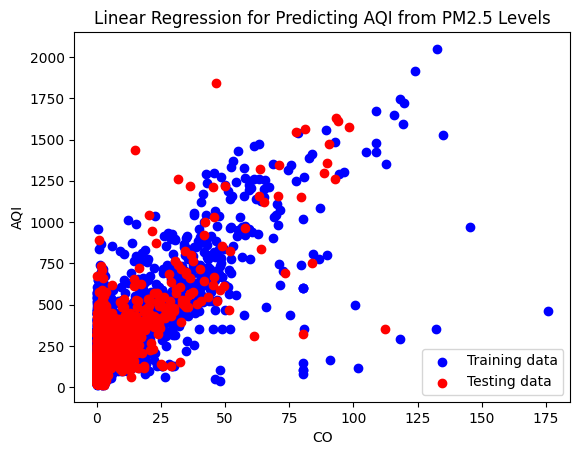

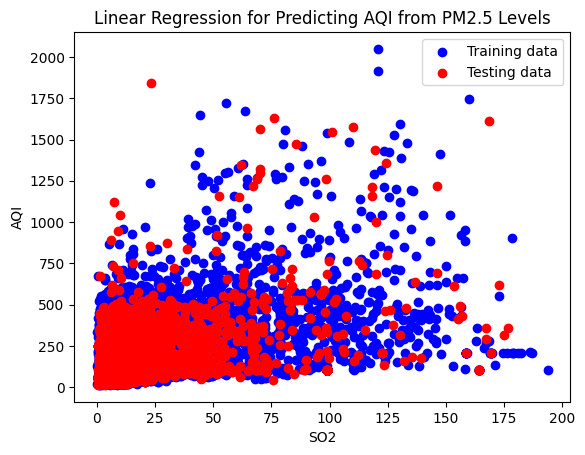

In [11]:
import matplotlib.pyplot as plt
import numpy as np

for i in X_train:
# Plotting the training data
    plt.scatter(X_train[i], y_train, color='blue', label='Training data')

    # Plotting the testing data
    plt.scatter(X_test[i], y_test, color='red', label='Testing data')


    # Adding labels and title
    plt.xlabel(i)
    plt.ylabel('AQI')
    plt.title('Linear Regression for Predicting AQI from', i)

    # Adding a legend to indicate which points are training and which are testing
    plt.legend()

    # Show the plot
    plt.show()


c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\shubh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but Line

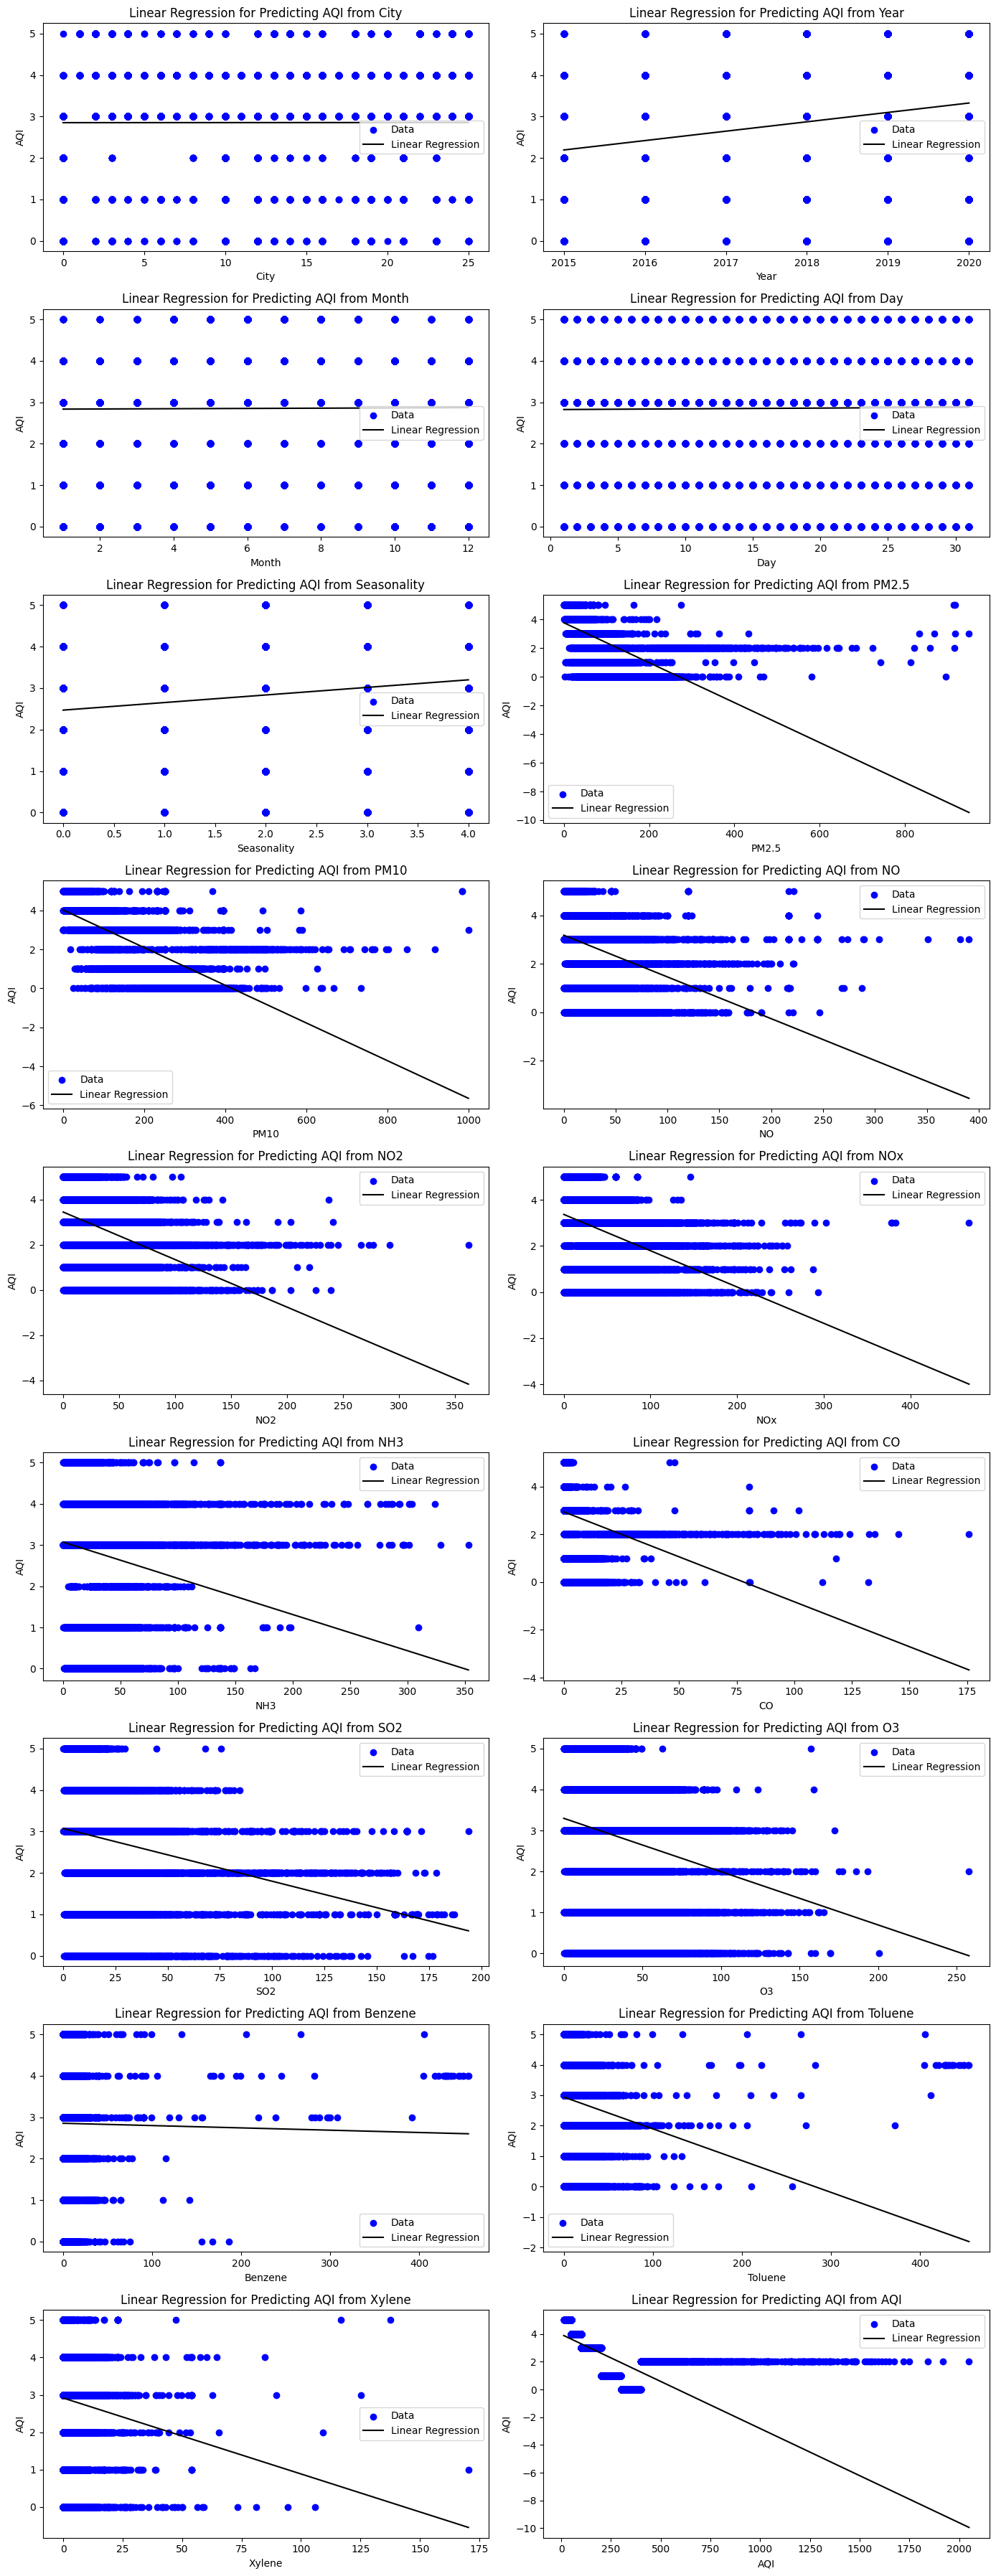

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv('clean_air.csv')

# Assuming the last column is the target 'AQI'
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]   # The last column

# Initialize Linear Regression model
linear_reg = LinearRegression()

# Determine the number of rows needed for subplots
n_rows = int(np.ceil(len(X.columns) / 2))

# Set up the matplotlib figure and axes
fig, axs = plt.subplots(n_rows, 2, figsize=(14, n_rows*4))
axs = axs.flatten()  # Flatten the 2D array of axes for easy iteration

# Plotting for each feature
for i, column in enumerate(X.columns):
    # Fit the model to the data
    X_feature = X[[column]]  # Selecting one feature at a time
    linear_reg.fit(X_feature, y)

    # Predicting the target
    y_pred = linear_reg.predict(X_feature)

    # Plotting the data
    axs[i].scatter(X_feature, y, color='blue', label='Data')
    
    # Creating a line for our model prediction
    line_x = np.linspace(X_feature.min().values, X_feature.max().values, 100).reshape(-1, 1)
    line_y = linear_reg.predict(line_x)

    # Plotting the line
    axs[i].plot(line_x, line_y, color='black', label='Linear Regression')

    # Adding labels and title
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('AQI')
    axs[i].set_title(f'Linear Regression for Predicting AQI from {column}')

    # Adding a legend
    axs[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


In [13]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score, max_error, mean_squared_error, r2_score

# Calculating additional regression metrics for training data
train_mae = mean_absolute_error(y_train, y_train_pred)
train_median_ae = median_absolute_error(y_train, y_train_pred)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
train_explained_variance = explained_variance_score(y_train, y_train_pred)
train_max_error = max_error(y_train, y_train_pred)

# Calculating additional regression metrics for testing data
test_mae = mean_absolute_error(y_test, y_test_pred)
test_median_ae = median_absolute_error(y_test, y_test_pred)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
test_explained_variance = explained_variance_score(y_test, y_test_pred)
test_max_error = max_error(y_test, y_test_pred)

# Compile all metrics into dictionaries
train_metrics = {
    'MSE': train_mse,
    'RMSE': train_rmse,
    'MAE': train_mae,
    'Median AE': train_median_ae,
    'R^2': train_r2,
    'Explained Variance': train_explained_variance,
    'Max Error': train_max_error
}
test_metrics = {
    'MSE': test_mse,
    'RMSE': test_rmse,
    'MAE': test_mae,
    'Median AE': test_median_ae,
    'R^2': test_r2,
    'Explained Variance': test_explained_variance,
    'Max Error': test_max_error
}

print("Training Metrics",train_metrics)
print("Testing Metrics",test_metrics)


Training Metrics {'MSE': 3557.8196779886466, 'RMSE': 59.647461622341034, 'MAE': 32.82167655568622, 'Median AE': 21.19087076834691, 'R^2': 0.8112370160052313, 'Explained Variance': 0.8112370160052313, 'Max Error': 1480.445815954483}
Testing Metrics {'MSE': 3759.8514628606704, 'RMSE': 61.31762766823803, 'MAE': 32.84993145701751, 'Median AE': 21.389444670403883, 'R^2': 0.8050621607177213, 'Explained Variance': 0.8050634709504196, 'Max Error': 1246.0802536479737}


In [14]:
from sklearn.linear_model import RidgeCV
import numpy as np
# Define the alpha parameters to test
alpha_space = np.logspace(-6, 6, 13)

# Initialize RidgeCV model
ridge_cv = RidgeCV(alphas=alpha_space, cv=5)

# Fit the model to the training data
ridge_cv.fit(X_train, y_train)

# The best alpha value after CV
best_alpha = ridge_cv.alpha_

# Predicting the target on the training and testing data using the best model
y_train_pred_ridge = ridge_cv.predict(X_train)
y_test_pred_ridge = ridge_cv.predict(X_test)

# Calculating the performance metrics for the training and testing set
train_mse_ridge = mean_squared_error(y_train, y_train_pred_ridge)
train_r2_ridge = r2_score(y_train, y_train_pred_ridge)
test_mse_ridge = mean_squared_error(y_test, y_test_pred_ridge)
test_r2_ridge = r2_score(y_test, y_test_pred_ridge)

print(f"Best alpha: {best_alpha}")
print(f"Training MSE: {train_mse_ridge}, Training R^2: {train_r2_ridge}")
print(f"Testing MSE: {test_mse_ridge}, Testing R^2: {test_r2_ridge}")


Best alpha: 10000.0
Training MSE: 3558.287449951844, Training R^2: 0.8112121979875705
Testing MSE: 3771.143694503327, Testing R^2: 0.804476689919516


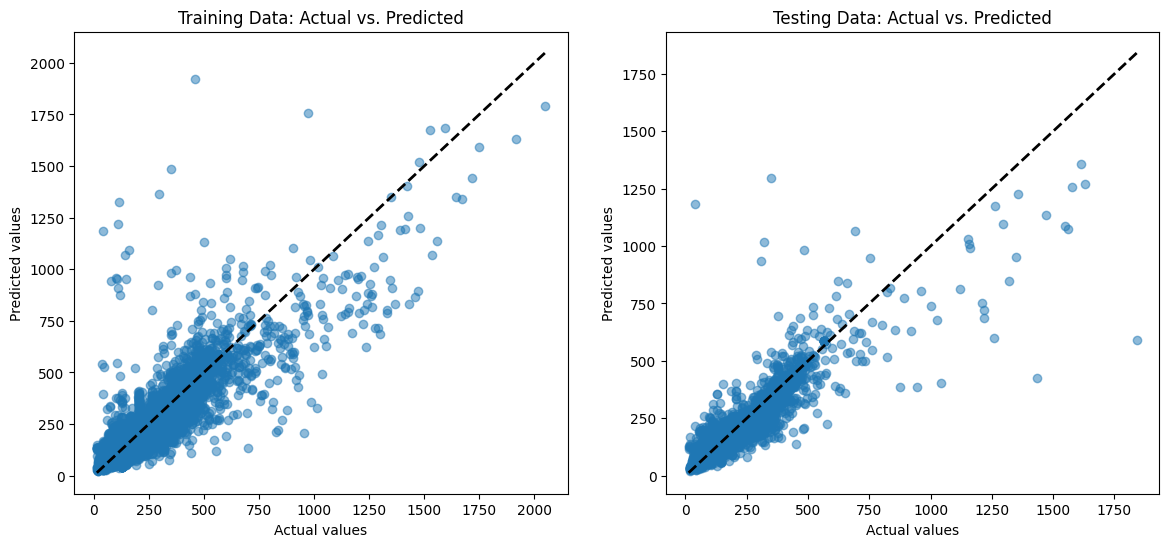

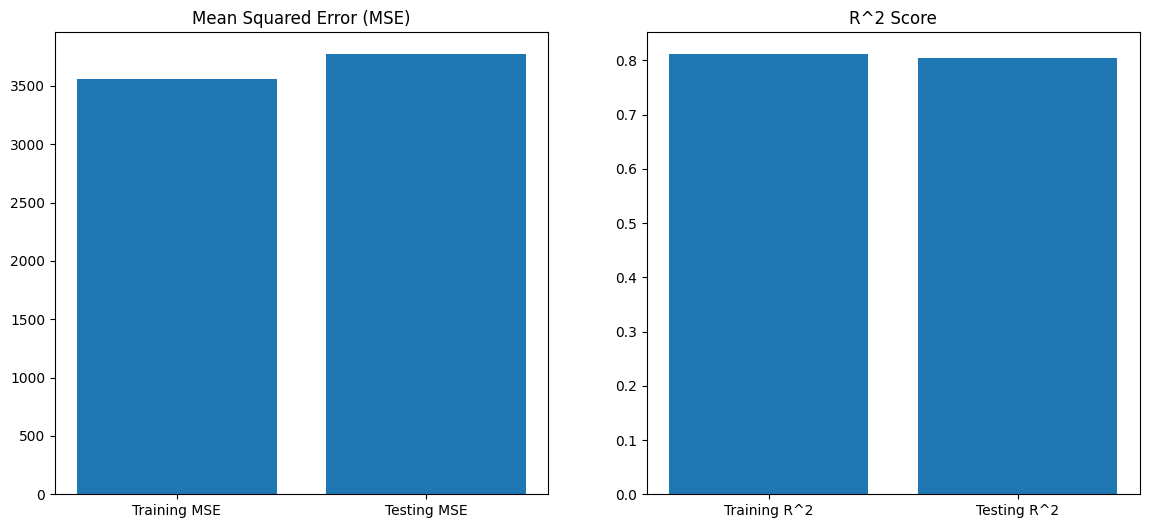

In [15]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values for the training set
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_ridge, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Training Data: Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Plot actual vs predicted values for the testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_ridge, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Testing Data: Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.show()

# Plotting performance metrics
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotting training MSE and R^2
ax[0].bar(['Training MSE', 'Testing MSE'], [train_mse_ridge, test_mse_ridge])
ax[0].set_title('Mean Squared Error (MSE)')

# Plotting training and testing R^2
ax[1].bar(['Training R^2', 'Testing R^2'], [train_r2_ridge, test_r2_ridge])
ax[1].set_title('R^2 Score')

plt.show()


In [16]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score, max_error

# Calculate additional regression metrics for the RidgeCV model on the training data
train_mae_ridge = mean_absolute_error(y_train, y_train_pred_ridge)
train_median_ae_ridge = median_absolute_error(y_train, y_train_pred_ridge)
train_rmse_ridge = np.sqrt(mean_squared_error(y_train, y_train_pred_ridge))
train_explained_variance_ridge = explained_variance_score(y_train, y_train_pred_ridge)
train_max_error_ridge = max_error(y_train, y_train_pred_ridge)

# Calculate additional regression metrics for the RidgeCV model on the testing data
test_mae_ridge = mean_absolute_error(y_test, y_test_pred_ridge)
test_median_ae_ridge = median_absolute_error(y_test, y_test_pred_ridge)
test_rmse_ridge = np.sqrt(mean_squared_error(y_test, y_test_pred_ridge))
test_explained_variance_ridge = explained_variance_score(y_test, y_test_pred_ridge)
test_max_error_ridge = max_error(y_test, y_test_pred_ridge)

# Compile all metrics into dictionaries
train_metrics_ridge = {
    'MSE': train_mse_ridge,
    'RMSE': train_rmse_ridge,
    'MAE': train_mae_ridge,
    'Median AE': train_median_ae_ridge,
    'R^2': train_r2_ridge,
    'Explained Variance': train_explained_variance_ridge,
    'Max Error': train_max_error_ridge
}

test_metrics_ridge = {
    'MSE': test_mse_ridge,
    'RMSE': test_rmse_ridge,
    'MAE': test_mae_ridge,
    'Median AE': test_median_ae_ridge,
    'R^2': test_r2_ridge,
    'Explained Variance': test_explained_variance_ridge,
    'Max Error': test_max_error_ridge
}

print(f"Best alpha: {best_alpha}")
print(f"Training Metrics: {train_metrics_ridge}")
print(f"Testing Metrics: {test_metrics_ridge}")


Best alpha: 10000.0
Training Metrics: {'MSE': 3558.287449951844, 'RMSE': 59.65138263235684, 'MAE': 32.89415351105614, 'Median AE': 21.058102676783136, 'R^2': 0.8112121979875705, 'Explained Variance': 0.8112121979875706, 'Max Error': 1462.8859489885817}
Testing Metrics: {'MSE': 3771.143694503327, 'RMSE': 61.40963844954086, 'MAE': 32.9374557806701, 'Median AE': 21.27542449191371, 'R^2': 0.804476689919516, 'Explained Variance': 0.8044778332405108, 'Max Error': 1250.4734414642744}


In [17]:
from sklearn.ensemble import RandomForestRegressor

# Initialize Random Forest Regressor model
random_forest_reg = RandomForestRegressor(random_state=42)

# Fit the model to the training data
random_forest_reg.fit(X_train, y_train)

# Predicting the target on the training and testing data
y_train_pred_rf = random_forest_reg.predict(X_train)
y_test_pred_rf = random_forest_reg.predict(X_test)

# Calculating the performance metrics for the training set
train_mse_rf = mean_squared_error(y_train, y_train_pred_rf)
train_r2_rf = r2_score(y_train, y_train_pred_rf)

# Calculating the performance metrics for the testing set
test_mse_rf = mean_squared_error(y_test, y_test_pred_rf)
test_r2_rf = r2_score(y_test, y_test_pred_rf)

(train_mse_rf, train_r2_rf), (test_mse_rf, test_r2_rf)


((276.52228030129703, 0.9853288880564572),
 (2451.9597398442143, 0.8728727082934548))

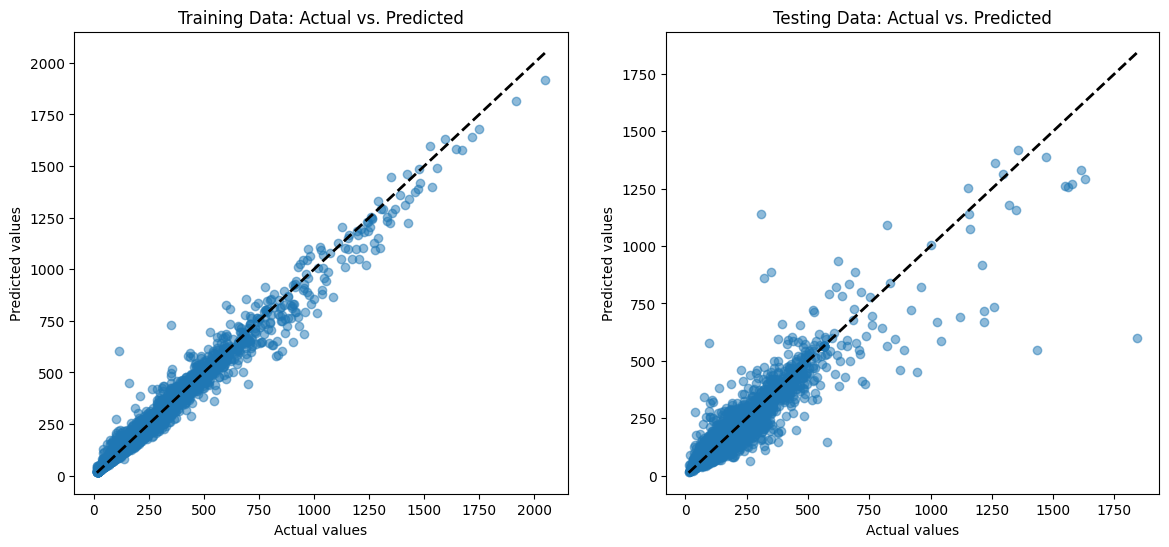

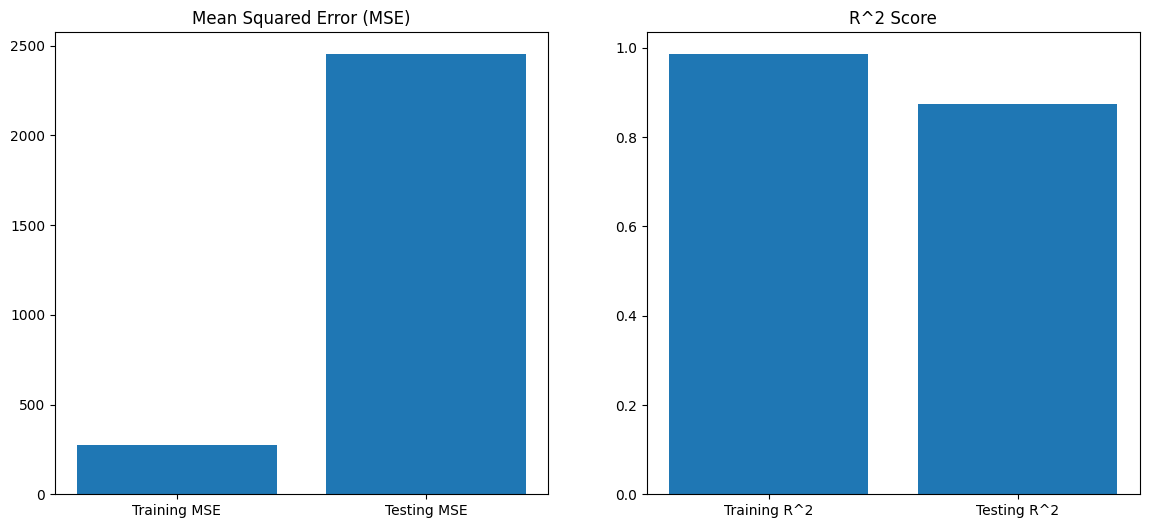

In [18]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values for the training set
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_rf, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Training Data: Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Plot actual vs predicted values for the testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_rf, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Testing Data: Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.show()

# Plotting performance metrics
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotting training MSE and R^2
ax[0].bar(['Training MSE', 'Testing MSE'], [train_mse_rf, test_mse_rf])
ax[0].set_title('Mean Squared Error (MSE)')

# Plotting training and testing R^2
ax[1].bar(['Training R^2', 'Testing R^2'], [train_r2_rf, test_r2_rf])
ax[1].set_title('R^2 Score')

plt.show()


In [19]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score, max_error, mean_squared_error, r2_score

# Calculate additional regression metrics for the RandomForestRegressor model on the training data
train_mae_rf = mean_absolute_error(y_train, y_train_pred_rf)
train_median_ae_rf = median_absolute_error(y_train, y_train_pred_rf)
train_rmse_rf = mean_squared_error(y_train, y_train_pred_rf, squared=False)
train_explained_variance_rf = explained_variance_score(y_train, y_train_pred_rf)
train_max_error_rf = max_error(y_train, y_train_pred_rf)

# Calculate additional regression metrics for the RandomForestRegressor model on the testing data
test_mae_rf = mean_absolute_error(y_test, y_test_pred_rf)
test_median_ae_rf = median_absolute_error(y_test, y_test_pred_rf)
test_rmse_rf = mean_squared_error(y_test, y_test_pred_rf, squared=False)
test_explained_variance_rf = explained_variance_score(y_test, y_test_pred_rf)
test_max_error_rf = max_error(y_test, y_test_pred_rf)

# Compile all metrics into dictionaries
train_metrics_rf = {
    'MSE': train_mse_rf,
    'RMSE': train_rmse_rf,
    'MAE': train_mae_rf,
    'Median AE': train_median_ae_rf,
    'R^2': train_r2_rf,
    'Explained Variance': train_explained_variance_rf,
    'Max Error': train_max_error_rf
}

test_metrics_rf = {
    'MSE': test_mse_rf,
    'RMSE': test_rmse_rf,
    'MAE': test_mae_rf,
    'Median AE': test_median_ae_rf,
    'R^2': test_r2_rf,
    'Explained Variance': test_explained_variance_rf,
    'Max Error': test_max_error_rf
}

print("Training Metrics:", train_metrics_rf)
print("Testing Metrics:", test_metrics_rf)


Training Metrics: {'MSE': 276.52228030129703, 'RMSE': 16.628959086524237, 'MAE': 8.001241491027608, 'Median AE': 4.159999999999997, 'R^2': 0.9853288880564572, 'Explained Variance': 0.9853312887507563, 'Max Error': 488.20000000000005}
Testing Metrics: {'MSE': 2451.9597398442143, 'RMSE': 49.5172670877969, 'MAE': 22.45102642870698, 'Median AE': 11.372019333637233, 'R^2': 0.8728727082934548, 'Explained Variance': 0.8728791847732269, 'Max Error': 1241.497037037037}


In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],  # Number of trees in the forest
    'max_depth': [None, 10],  # Maximum depth of the tree
    'min_samples_split': [2, 5],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required at each leaf node
    'bootstrap': [True, False]  # Method of selecting samples for training each tree
}

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

# Use the best estimator to make predictions
y_train_pred_rf_tuned = best_rf.predict(X_train)
y_test_pred_rf_tuned = best_rf.predict(X_test)

# Calculate the performance metrics for the best estimator
train_mse_rf_tuned = mean_squared_error(y_train, y_train_pred_rf_tuned)
train_r2_rf_tuned = r2_score(y_train, y_train_pred_rf_tuned)
test_mse_rf_tuned = mean_squared_error(y_test, y_test_pred_rf_tuned)
test_r2_rf_tuned = r2_score(y_test, y_test_pred_rf_tuned)

print(f"Best parameters: {best_params}")
print(f"Tuned Training MSE: {train_mse_rf_tuned}, Tuned Training R^2: {train_r2_rf_tuned}")
print(f"Tuned Testing MSE: {test_mse_rf_tuned}, Tuned Testing R^2: {test_r2_rf_tuned}")


Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Training MSE: 528.2311460645495, Tuned Training R^2: 0.9719742717746476
Tuned Testing MSE: 2506.5152410784654, Tuned Testing R^2: 0.8700441573156789


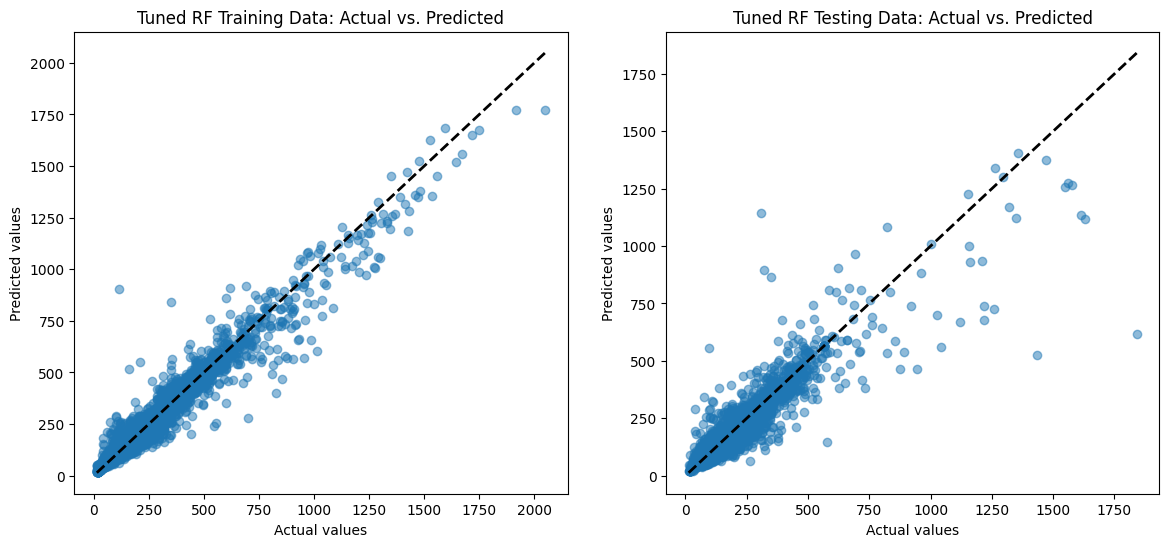

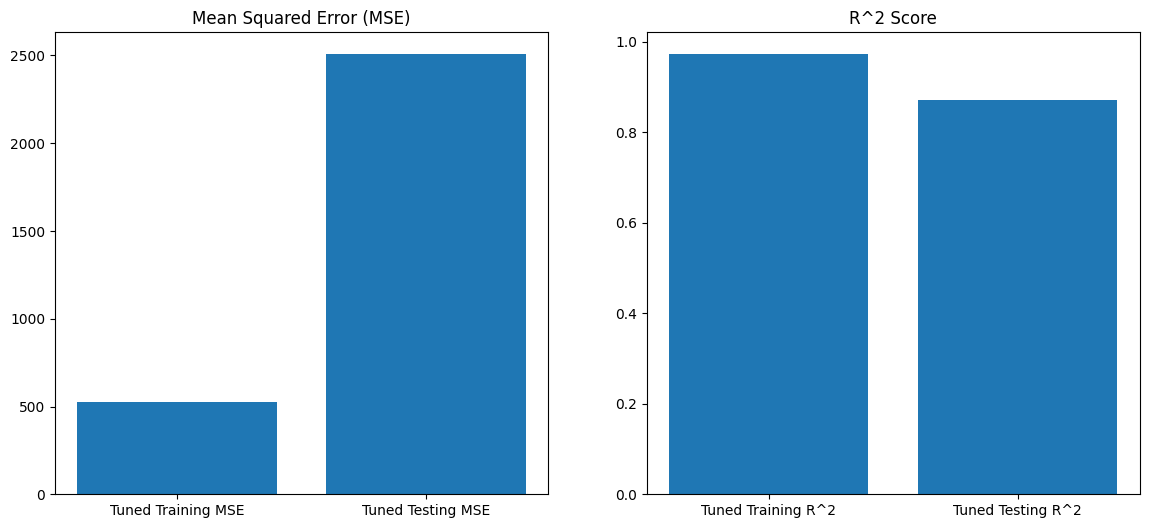

In [21]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values for the training set
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_rf_tuned, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Tuned RF Training Data: Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Plot actual vs predicted values for the testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_rf_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Tuned RF Testing Data: Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.show()

# Plotting performance metrics
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Plotting training MSE and R^2
ax[0].bar(['Tuned Training MSE', 'Tuned Testing MSE'], [train_mse_rf_tuned, test_mse_rf_tuned])
ax[0].set_title('Mean Squared Error (MSE)')

# Plotting training and testing R^2
ax[1].bar(['Tuned Training R^2', 'Tuned Testing R^2'], [train_r2_rf_tuned, test_r2_rf_tuned])
ax[1].set_title('R^2 Score')

plt.show()


In [22]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score, max_error, mean_squared_error, r2_score

# After fitting the grid search and getting the best estimator in your local environment

# Calculate additional regression metrics for the tuned RandomForestRegressor model on the training data
train_mae_rf_tuned = mean_absolute_error(y_train, y_train_pred_rf_tuned)
train_median_ae_rf_tuned = median_absolute_error(y_train, y_train_pred_rf_tuned)
train_rmse_rf_tuned = mean_squared_error(y_train, y_train_pred_rf_tuned, squared=False)
train_explained_variance_rf_tuned = explained_variance_score(y_train, y_train_pred_rf_tuned)
train_max_error_rf_tuned = max_error(y_train, y_train_pred_rf_tuned)

# Calculate additional regression metrics for the tuned RandomForestRegressor model on the testing data
test_mae_rf_tuned = mean_absolute_error(y_test, y_test_pred_rf_tuned)
test_median_ae_rf_tuned = median_absolute_error(y_test, y_test_pred_rf_tuned)
test_rmse_rf_tuned = mean_squared_error(y_test, y_test_pred_rf_tuned, squared=False)
test_explained_variance_rf_tuned = explained_variance_score(y_test, y_test_pred_rf_tuned)
test_max_error_rf_tuned = max_error(y_test, y_test_pred_rf_tuned)

# Compile all metrics into dictionaries
train_metrics_rf_tuned = {
    'MSE': train_mse_rf_tuned,
    'RMSE': train_rmse_rf_tuned,
    'MAE': train_mae_rf_tuned,
    'Median AE': train_median_ae_rf_tuned,
    'R^2': train_r2_rf_tuned,
    'Explained Variance': train_explained_variance_rf_tuned,
    'Max Error': train_max_error_rf_tuned
}

test_metrics_rf_tuned = {
    'MSE': test_mse_rf_tuned,
    'RMSE': test_rmse_rf_tuned,
    'MAE': test_mae_rf_tuned,
    'Median AE': test_median_ae_rf_tuned,
    'R^2': test_r2_rf_tuned,
    'Explained Variance': test_explained_variance_rf_tuned,
    'Max Error': test_max_error_rf_tuned
}

print("Best Parameters:", best_params)
print("Tuned Training Metrics:", train_metrics_rf_tuned)
print("Tuned Testing Metrics:", test_metrics_rf_tuned)


Best Parameters: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Tuned Training Metrics: {'MSE': 528.2311460645495, 'RMSE': 22.98327970644202, 'MAE': 10.218446938711764, 'Median AE': 4.926511269450323, 'R^2': 0.9719742717746476, 'Explained Variance': 0.9719760548763183, 'Max Error': 790.0039738095239}
Tuned Testing Metrics: {'MSE': 2506.5152410784654, 'RMSE': 50.065110017640684, 'MAE': 22.401794730500924, 'Median AE': 11.263133460751064, 'R^2': 0.8700441573156789, 'Explained Variance': 0.8700619262476548, 'Max Error': 1225.5486849647266}


In [23]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize Gradient Boosting Regressor model
gradient_boosting_reg = GradientBoostingRegressor(random_state=42)

# Fit the model to the training data
gradient_boosting_reg.fit(X_train, y_train)

# Predicting the target on the training and testing data
y_train_pred_gb = gradient_boosting_reg.predict(X_train)
y_test_pred_gb = gradient_boosting_reg.predict(X_test)

# Calculating the performance metrics for the training set
train_mse_gb = mean_squared_error(y_train, y_train_pred_gb)
train_r2_gb = r2_score(y_train, y_train_pred_gb)

# Calculating the performance metrics for the testing set
test_mse_gb = mean_squared_error(y_test, y_test_pred_gb)
test_r2_gb = r2_score(y_test, y_test_pred_gb)

(train_mse_gb, train_r2_gb), (test_mse_gb, test_r2_gb)


((1669.3131016817954, 0.9114332510316663),
 (2697.1452896410947, 0.8601605195879265))

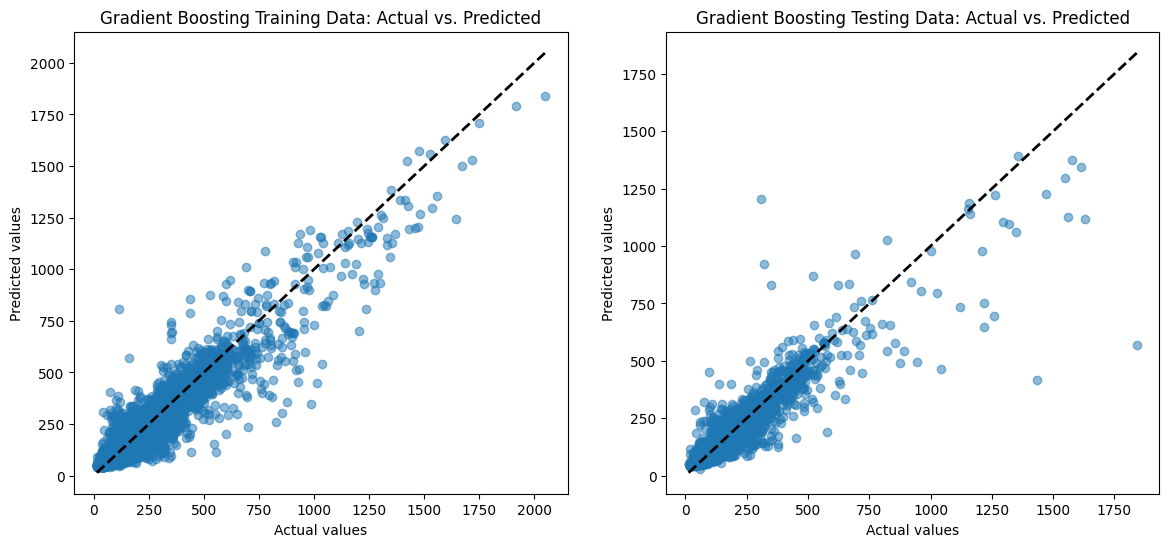

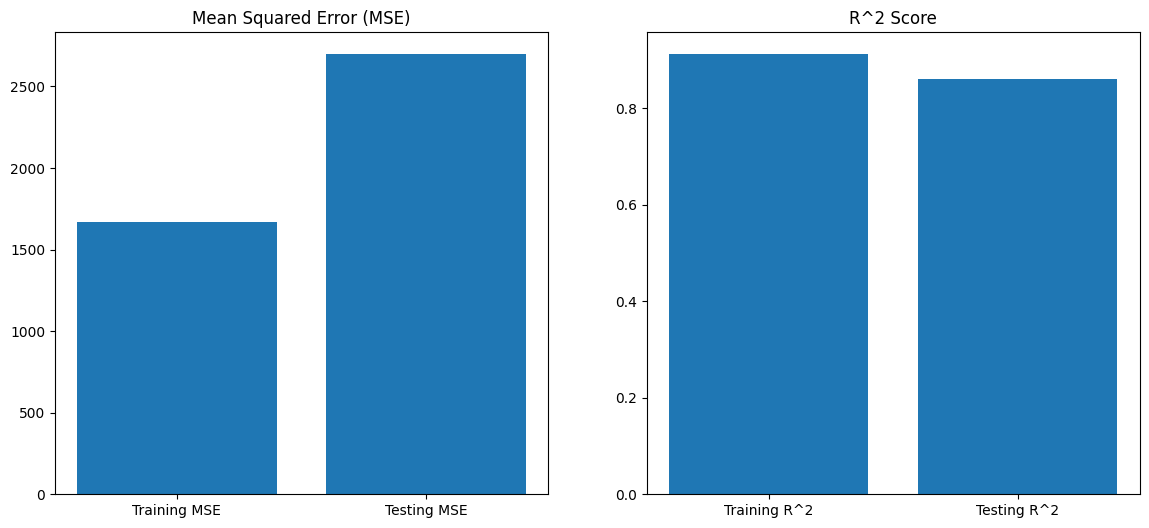

In [24]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted values
plt.figure(figsize=(14, 6))

# Scatter plot for training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_gb, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Gradient Boosting Training Data: Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Scatter plot for testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_gb, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Gradient Boosting Testing Data: Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.show()

# Bar plot for performance metrics
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for training and testing MSE
ax[0].bar(['Training MSE', 'Testing MSE'], [train_mse_gb, test_mse_gb])
ax[0].set_title('Mean Squared Error (MSE)')

# Bar plot for training and testing R^2
ax[1].bar(['Training R^2', 'Testing R^2'], [train_r2_gb, test_r2_gb])
ax[1].set_title('R^2 Score')

plt.show()


In [25]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score, max_error, mean_squared_error, r2_score

# Calculating additional regression metrics for the GradientBoostingRegressor model on the training data
train_mae_gb = mean_absolute_error(y_train, y_train_pred_gb)
train_median_ae_gb = median_absolute_error(y_train, y_train_pred_gb)
train_rmse_gb = mean_squared_error(y_train, y_train_pred_gb, squared=False)
train_explained_variance_gb = explained_variance_score(y_train, y_train_pred_gb)
train_max_error_gb = max_error(y_train, y_train_pred_gb)

# Calculating additional regression metrics for the GradientBoostingRegressor model on the testing data
test_mae_gb = mean_absolute_error(y_test, y_test_pred_gb)
test_median_ae_gb = median_absolute_error(y_test, y_test_pred_gb)
test_rmse_gb = mean_squared_error(y_test, y_test_pred_gb, squared=False)
test_explained_variance_gb = explained_variance_score(y_test, y_test_pred_gb)
test_max_error_gb = max_error(y_test, y_test_pred_gb)

# Compile all metrics into dictionaries
train_metrics_gb = {
    'MSE': train_mse_gb,
    'RMSE': train_rmse_gb,
    'MAE': train_mae_gb,
    'Median AE': train_median_ae_gb,
    'R^2': train_r2_gb,
    'Explained Variance': train_explained_variance_gb,
    'Max Error': train_max_error_gb
}

test_metrics_gb = {
    'MSE': test_mse_gb,
    'RMSE': test_rmse_gb,
    'MAE': test_mae_gb,
    'Median AE': test_median_ae_gb,
    'R^2': test_r2_gb,
    'Explained Variance': test_explained_variance_gb,
    'Max Error': test_max_error_gb
}

print("Training Metrics:", train_metrics_gb)
print("Testing Metrics:", test_metrics_gb)

Training Metrics: {'MSE': 1669.3131016817954, 'RMSE': 40.85722826724538, 'MAE': 23.72675691863523, 'Median AE': 14.966738591122834, 'R^2': 0.9114332510316663, 'Explained Variance': 0.9114332510316663, 'Max Error': 690.8757174103157}
Testing Metrics: {'MSE': 2697.1452896410947, 'RMSE': 51.934047499122336, 'MAE': 25.50366428661547, 'Median AE': 14.93427167935112, 'R^2': 0.8601605195879265, 'Explained Variance': 0.8601743397330044, 'Max Error': 1273.568919549466}


In [26]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],  # Number of boosting stages to be run
    'learning_rate': [0.01, 0.1],  # Learning rate shrinks the contribution of each tree
    'max_depth': [3, 4],  # Maximum depth of the individual regression estimators
    'min_samples_split': [2, 4],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2],  # Minimum number of samples required at a leaf node
    'max_features': ['sqrt', 'log2', None]  # The number of features to consider when looking for the best split
}

# Initialize the GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params_gb = grid_search.best_params_
best_gb = grid_search.best_estimator_

# Use the best estimator to make predictions
y_train_pred_gb_tuned = best_gb.predict(X_train)
y_test_pred_gb_tuned = best_gb.predict(X_test)

# Calculate the performance metrics for the best estimator
train_mse_gb_tuned = mean_squared_error(y_train, y_train_pred_gb_tuned)
train_r2_gb_tuned = r2_score(y_train, y_train_pred_gb_tuned)
test_mse_gb_tuned = mean_squared_error(y_test, y_test_pred_gb_tuned)
test_r2_gb_tuned = r2_score(y_test, y_test_pred_gb_tuned)

print(f"Best parameters: {best_params_gb}")
print(f"Tuned Training MSE: {train_mse_gb_tuned}, Tuned Training R^2: {train_r2_gb_tuned}")
print(f"Tuned Testing MSE: {test_mse_gb_tuned}, Tuned Testing R^2: {test_r2_gb_tuned}")


Fitting 3 folds for each of 96 candidates, totalling 288 fits


Best parameters: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Tuned Training MSE: 1118.2574633891845, Tuned Training R^2: 0.940669951046227
Tuned Testing MSE: 2473.466455455366, Tuned Testing R^2: 0.8717576449158961


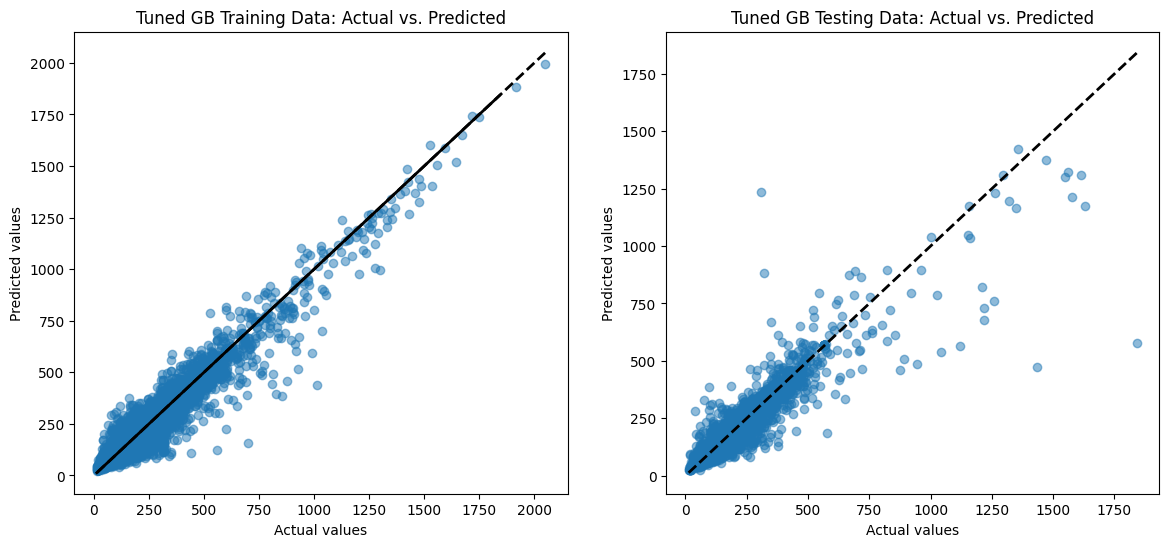

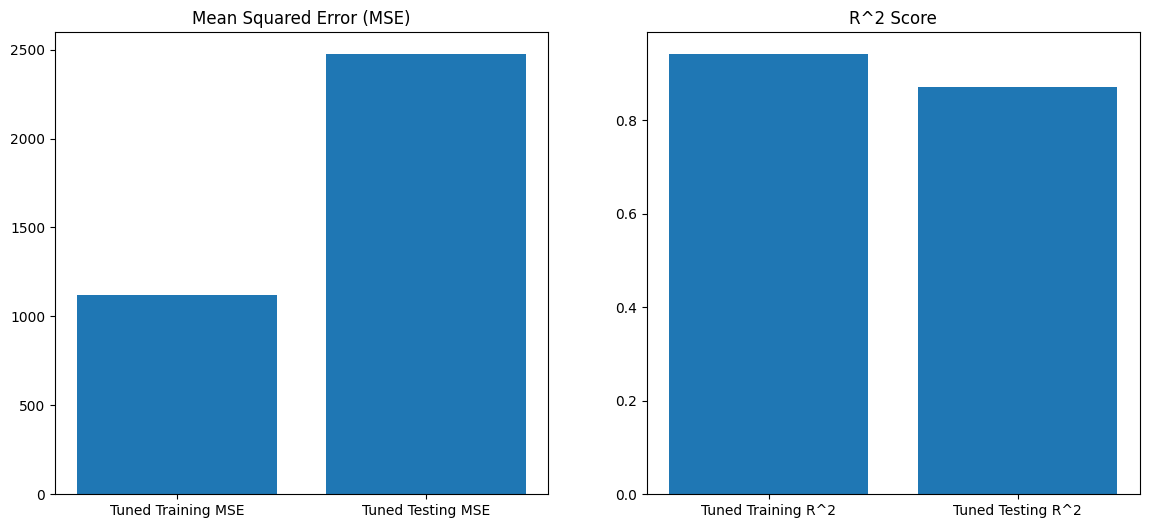

In [27]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted values
plt.figure(figsize=(14, 6))

# Scatter plot for training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_gb_tuned, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k', lw=2)
plt.title('Tuned GB Training Data: Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Scatter plot for testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_gb_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Tuned GB Testing Data: Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.show()

# Bar plot for performance metrics
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Bar plot for training and testing MSE
ax[0].bar(['Tuned Training MSE', 'Tuned Testing MSE'], [train_mse_gb_tuned, test_mse_gb_tuned])
ax[0].set_title('Mean Squared Error (MSE)')

# Bar plot for training and testing R^2
ax[1].bar(['Tuned Training R^2', 'Tuned Testing R^2'], [train_r2_gb_tuned, test_r2_gb_tuned])
ax[1].set_title('R^2 Score')

plt.show()


In [28]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score, max_error, mean_squared_error, r2_score

# Calculate additional regression metrics for the GradientBoostingRegressor model on the training data
train_mae_gb_tuned = mean_absolute_error(y_train, y_train_pred_gb_tuned)
train_median_ae_gb_tuned = median_absolute_error(y_train, y_train_pred_gb_tuned)
train_rmse_gb_tuned = mean_squared_error(y_train, y_train_pred_gb_tuned, squared=False)
train_explained_variance_gb_tuned = explained_variance_score(y_train, y_train_pred_gb_tuned)
train_max_error_gb_tuned = max_error(y_train, y_train_pred_gb_tuned)

# Calculate additional regression metrics for the GradientBoostingRegressor model on the testing data
test_mae_gb_tuned = mean_absolute_error(y_test, y_test_pred_gb_tuned)
test_median_ae_gb_tuned = median_absolute_error(y_test, y_test_pred_gb_tuned)
test_rmse_gb_tuned = mean_squared_error(y_test, y_test_pred_gb_tuned, squared=False)
test_explained_variance_gb_tuned = explained_variance_score(y_test, y_test_pred_gb_tuned)
test_max_error_gb_tuned = max_error(y_test, y_test_pred_gb_tuned)

# Compile all metrics into dictionaries
train_metrics_gb_tuned = {
    'MSE': train_mse_gb_tuned,
    'RMSE': train_rmse_gb_tuned,
    'MAE': train_mae_gb_tuned,
    'Median AE': train_median_ae_gb_tuned,
    'R^2': train_r2_gb_tuned,
    'Explained Variance': train_explained_variance_gb_tuned,
    'Max Error': train_max_error_gb_tuned
}

test_metrics_gb_tuned = {
    'MSE': test_mse_gb_tuned,
    'RMSE': test_rmse_gb_tuned,
    'MAE': test_mae_gb_tuned,
    'Median AE': test_median_ae_gb_tuned,
    'R^2': test_r2_gb_tuned,
    'Explained Variance': test_explained_variance_gb_tuned,
    'Max Error': test_max_error_gb_tuned
}

print("Training Metrics:")
for metric, value in train_metrics_gb_tuned.items():
    print(f"{metric}: {value}")

print("\nTesting Metrics:")
for metric, value in test_metrics_gb_tuned.items():
    print(f"{metric}: {value}")


Training Metrics:
MSE: 1118.2574633891845
RMSE: 33.440356807145236
MAE: 20.540805983539297
Median AE: 13.185605651095557
R^2: 0.940669951046227
Explained Variance: 0.940669951046227
Max Error: 575.3919836077823

Testing Metrics:
MSE: 2473.466455455366
RMSE: 49.733956764522226
MAE: 23.74240096242362
Median AE: 13.357568011236737
R^2: 0.8717576449158961
Explained Variance: 0.8717835069760832
Max Error: 1263.5745462068885


In [29]:
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Normalizing the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Neural network architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # Output layer for regression

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Fit the model
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=100, batch_size=64, verbose=0)

# Predicting the target on the training and testing data
y_train_pred_nn = model.predict(X_train_scaled)
y_test_pred_nn = model.predict(X_test_scaled)

# Calculating the performance metrics for the training set
train_mse_nn = mean_squared_error(y_train, y_train_pred_nn)
train_mae_nn = mean_absolute_error(y_train, y_train_pred_nn)

# Calculating the performance metrics for the testing set
test_mse_nn = mean_squared_error(y_test, y_test_pred_nn)
test_mae_nn = mean_absolute_error(y_test, y_test_pred_nn)

(train_mse_nn, train_mae_nn), (test_mse_nn, test_mae_nn)


176/176 [==============================] - 0s 938us/step


((2213.186821963341, 26.095131253385148),
 (2778.7224337765974, 26.698135405955497))

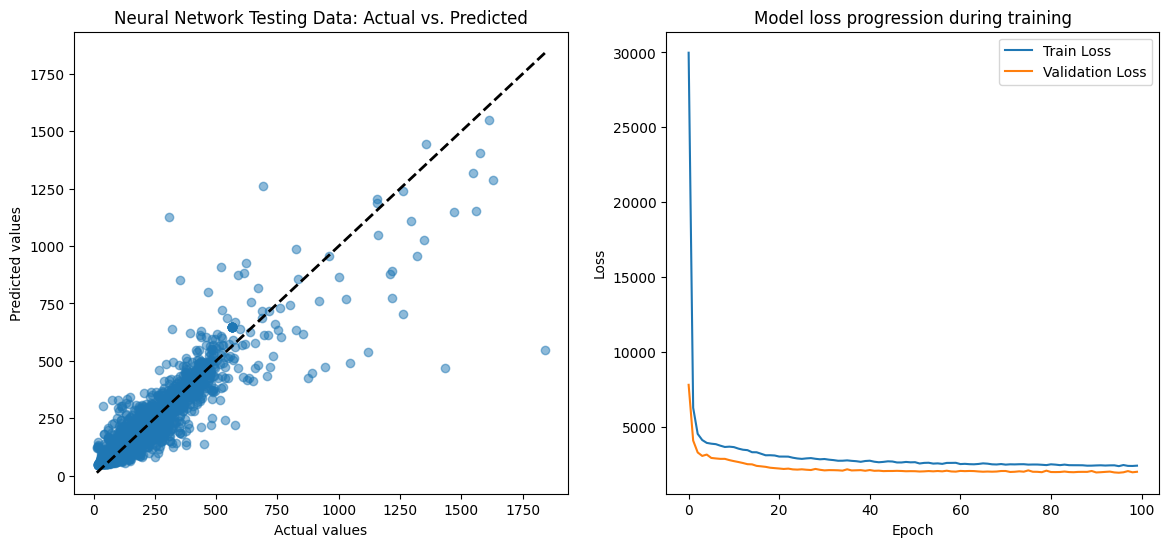

In [30]:
import matplotlib.pyplot as plt

# Plotting actual vs predicted values for the testing set
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_test_pred_nn, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Neural Network Testing Data: Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Plotting training and validation loss over epochs
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss progression during training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()


In [31]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score, max_error, mean_squared_error, r2_score

# Assuming y_train_pred_nn and y_test_pred_nn are numpy arrays and y_train and y_test are the true values
# Convert predictions from list to numpy array if they are not already (for calculation purposes)
y_train_pred_nn = np.array(y_train_pred_nn).flatten()
y_test_pred_nn = np.array(y_test_pred_nn).flatten()

# Calculating additional regression metrics for training data
train_mae_nn = mean_absolute_error(y_train, y_train_pred_nn)
train_median_ae_nn = median_absolute_error(y_train, y_train_pred_nn)
train_rmse_nn = mean_squared_error(y_train, y_train_pred_nn, squared=False)
train_explained_variance_nn = explained_variance_score(y_train, y_train_pred_nn)
train_max_error_nn = max_error(y_train, y_train_pred_nn)
train_r2_nn = r2_score(y_train, y_train_pred_nn)

# Calculating additional regression metrics for testing data
test_mae_nn = mean_absolute_error(y_test, y_test_pred_nn)
test_median_ae_nn = median_absolute_error(y_test, y_test_pred_nn)
test_rmse_nn = mean_squared_error(y_test, y_test_pred_nn, squared=False)
test_explained_variance_nn = explained_variance_score(y_test, y_test_pred_nn)
test_max_error_nn = max_error(y_test, y_test_pred_nn)
test_r2_nn = r2_score(y_test, y_test_pred_nn)

# Compile all metrics into dictionaries
train_metrics_nn = {
    'MSE': train_mse_nn,
    'RMSE': train_rmse_nn,
    'MAE': train_mae_nn,
    'Median AE': train_median_ae_nn,
    'R^2': train_r2_nn,
    'Explained Variance': train_explained_variance_nn,
    'Max Error': train_max_error_nn
}
test_metrics_nn = {
    'MSE': test_mse_nn,
    'RMSE': test_rmse_nn,
    'MAE': test_mae_nn,
    'Median AE': test_median_ae_nn,
    'R^2': test_r2_nn,
    'Explained Variance': test_explained_variance_nn,
    'Max Error': test_max_error_nn
}
print("Traning Metrics", train_metrics_nn)

print("Traning Metrics",test_metrics_nn)



Traning Metrics {'MSE': 2213.186821963341, 'RMSE': 47.044519574158066, 'MAE': 26.095131253385148, 'Median AE': 16.452232360839844, 'R^2': 0.8825775934524379, 'Explained Variance': 0.8833428819800258, 'Max Error': 1279.38037109375}
Traning Metrics {'MSE': 2778.7224337765974, 'RMSE': 52.71358870136426, 'MAE': 26.698135405955497, 'Median AE': 16.039608001708984, 'R^2': 0.8559309715938963, 'Explained Variance': 0.8565926759153327, 'Max Error': 1292.9568481445312}


In [32]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32),
                    input_dim=X_train_scaled.shape[1], 
                    activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, default=0.2, step=0.1)))
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(Dense(units=hp.Int('units_' + str(i), min_value=32, max_value=512, step=32),
                        activation='relu'))
        model.add(Dropout(rate=hp.Float('dropout_' + str(i), min_value=0.0, max_value=0.5, default=0.2, step=0.1)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='LOG')),
                  loss='mean_squared_error')
    return model

tuner = kt.Hyperband(build_model,
                     objective='val_loss',
                     max_epochs=10,
                     factor=3,
                     directory='my_dir',
                     project_name='air_quality')

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

tuner.search(X_train_scaled, y_train, epochs=50, validation_split=0.2, callbacks=[stop_early])

# Get the best hyperparameters.
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

# Build the model with the best hyperparameters and train it on the data for 50 epochs.
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

# Predicting the target on the training and testing data
y_train_pred_nn_tuned = model.predict(X_train_scaled)
y_test_pred_nn_tuned = model.predict(X_test_scaled)

# Calculating the performance metrics for the training and testing set
train_mse_nn_tuned = mean_squared_error(y_train, y_train_pred_nn_tuned)
train_mae_nn_tuned = mean_absolute_error(y_train, y_train_pred_nn_tuned)
test_mse_nn_tuned = mean_squared_error(y_test, y_test_pred_nn_tuned)
test_mae_nn_tuned = mean_absolute_error(y_test, y_test_pred_nn_tuned)

print(f"Tuned Training MSE: {train_mse_nn_tuned}, Tuned Training MAE: {train_mae_nn_tuned}")
print(f"Tuned Testing MSE: {test_mse_nn_tuned}, Tuned Testing MAE: {test_mae_nn_tuned}")


Reloading Tuner from my_dir\air_quality\tuner0.json
Epoch 1/50
564/564 [==============================] - 6s 9ms/step - loss: 6954.0317 - val_loss: 2763.6396
Epoch 2/50
564/564 [==============================] - 5s 9ms/step - loss: 3611.5703 - val_loss: 2393.0344
Epoch 3/50
564/564 [==============================] - 4s 8ms/step - loss: 3564.7656 - val_loss: 2443.8010
Epoch 4/50
564/564 [==============================] - 5s 8ms/step - loss: 3178.1833 - val_loss: 2070.4683
Epoch 5/50
564/564 [==============================] - 5s 8ms/step - loss: 3214.0269 - val_loss: 2204.5308
Epoch 6/50
564/564 [==============================] - 5s 8ms/step - loss: 3138.4116 - val_loss: 2177.6204
Epoch 7/50
564/564 [==============================] - 5s 8ms/step - loss: 3154.5840 - val_loss: 2051.1860
Epoch 8/50
564/564 [==============================] - 5s 9ms/step - loss: 3092.0166 - val_loss: 2155.4380
Epoch 9/50
564/564 [==============================] - 4s 8ms/step - loss: 2966.5234 - val_loss: 2306

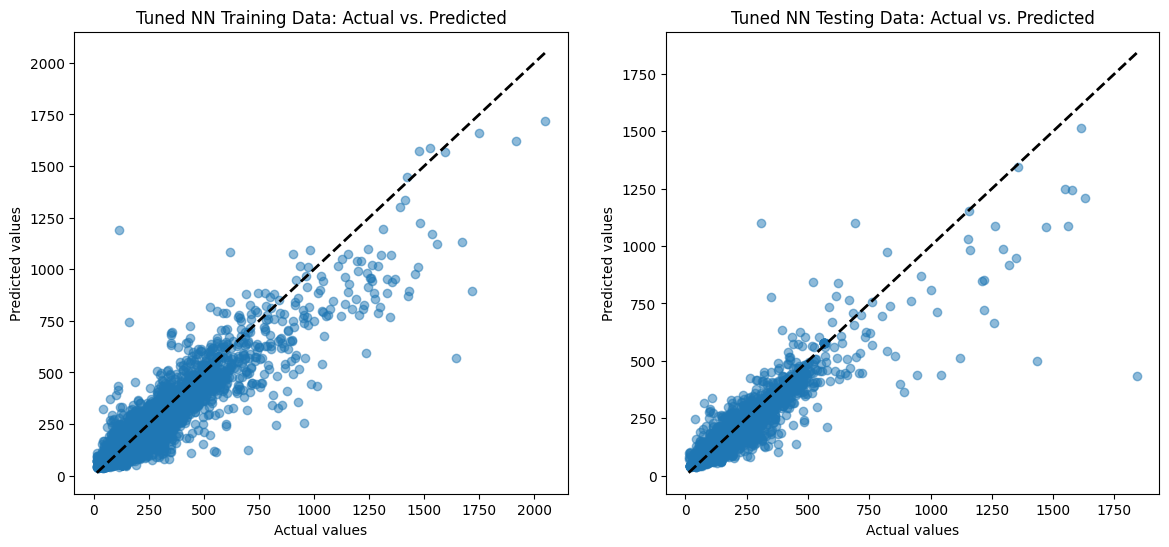

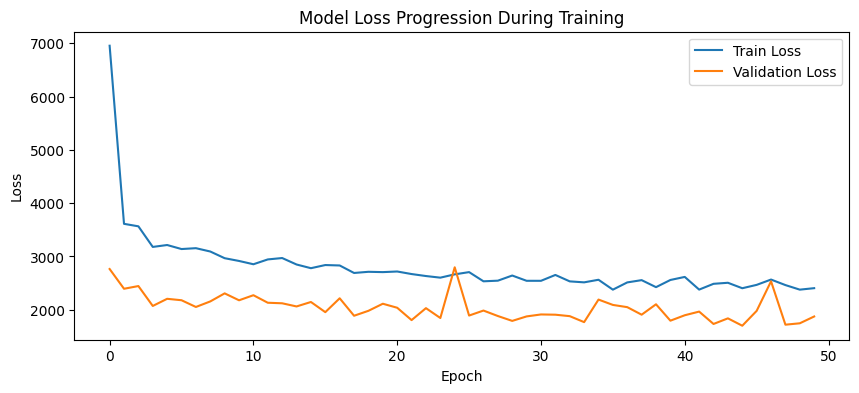

In [33]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs predicted values
plt.figure(figsize=(14, 6))

# Scatter plot for training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_nn_tuned, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Tuned NN Training Data: Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Scatter plot for testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_nn_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Tuned NN Testing Data: Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.show()

# Plotting model loss over epochs
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Progression During Training')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()


In [34]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score, max_error, mean_squared_error, r2_score

# Ensure predictions are in the correct format
y_train_pred_nn_tuned = np.array(y_train_pred_nn_tuned).flatten()
y_test_pred_nn_tuned = np.array(y_test_pred_nn_tuned).flatten()

# Calculating additional regression metrics for training data
train_mae_nn_tuned = mean_absolute_error(y_train, y_train_pred_nn_tuned)
train_median_ae_nn_tuned = median_absolute_error(y_train, y_train_pred_nn_tuned)
train_rmse_nn_tuned = mean_squared_error(y_train, y_train_pred_nn_tuned, squared=False)
train_explained_variance_nn_tuned = explained_variance_score(y_train, y_train_pred_nn_tuned)
train_max_error_nn_tuned = max_error(y_train, y_train_pred_nn_tuned)
train_r2_nn_tuned = r2_score(y_train, y_train_pred_nn_tuned)

# Calculating additional regression metrics for testing data
test_mae_nn_tuned = mean_absolute_error(y_test, y_test_pred_nn_tuned)
test_median_ae_nn_tuned = median_absolute_error(y_test, y_test_pred_nn_tuned)
test_rmse_nn_tuned = mean_squared_error(y_test, y_test_pred_nn_tuned, squared=False)
test_explained_variance_nn_tuned = explained_variance_score(y_test, y_test_pred_nn_tuned)
test_max_error_nn_tuned = max_error(y_test, y_test_pred_nn_tuned)
test_r2_nn_tuned = r2_score(y_test, y_test_pred_nn_tuned)

# Compile all metrics into dictionaries
train_metrics_nn_tuned = {
    'MSE': train_mse_nn_tuned,
    'RMSE': train_rmse_nn_tuned,
    'MAE': train_mae_nn_tuned,
    'Median AE': train_median_ae_nn_tuned,
    'R^2': train_r2_nn_tuned,
    'Explained Variance': train_explained_variance_nn_tuned,
    'Max Error': train_max_error_nn_tuned
}
test_metrics_nn_tuned = {
    'MSE': test_mse_nn_tuned,
    'RMSE': test_rmse_nn_tuned,
    'MAE': test_mae_nn_tuned,
    'Median AE': test_median_ae_nn_tuned,
    'R^2': test_r2_nn_tuned,
    'Explained Variance': test_explained_variance_nn_tuned,
    'Max Error': test_max_error_nn_tuned
}

print("Tuned Training Metrics:", train_metrics_nn_tuned)
print("Tuned Testing Metrics:", test_metrics_nn_tuned)


Tuned Training Metrics: {'MSE': 2028.6827771190356, 'RMSE': 45.04090115793683, 'MAE': 23.975832056150534, 'Median AE': 13.97607421875, 'R^2': 0.8923666039184223, 'Explained Variance': 0.8947063544300322, 'Max Error': 1078.4248657226562}
Tuned Testing Metrics: {'MSE': 2782.551144283916, 'RMSE': 52.7498923627709, 'MAE': 25.199742848623888, 'Median AE': 13.757247924804688, 'R^2': 0.8557324636047093, 'Explained Variance': 0.8579238791958501, 'Max Error': 1407.3981018066406}


In [35]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Initialize Support Vector Regressor model
svr = SVR()

# Fit the model to the training data
svr.fit(X_train, y_train)

# Predicting the target on the training and testing data
y_train_pred_svr = svr.predict(X_train)
y_test_pred_svr = svr.predict(X_test)

# Calculating the performance metrics for the training and testing set
train_mse_svr = mean_squared_error(y_train, y_train_pred_svr)
train_r2_svr = r2_score(y_train, y_train_pred_svr)
test_mse_svr = mean_squared_error(y_test, y_test_pred_svr)
test_r2_svr = r2_score(y_test, y_test_pred_svr)

print(f"Training MSE: {train_mse_svr}, Training R^2: {train_r2_svr}")
print(f"Testing MSE: {test_mse_svr}, Testing R^2: {test_r2_svr}")


Training MSE: 7310.290714228808, Training R^2: 0.6121466476718155
Testing MSE: 8066.186284756044, Testing R^2: 0.581790679464147


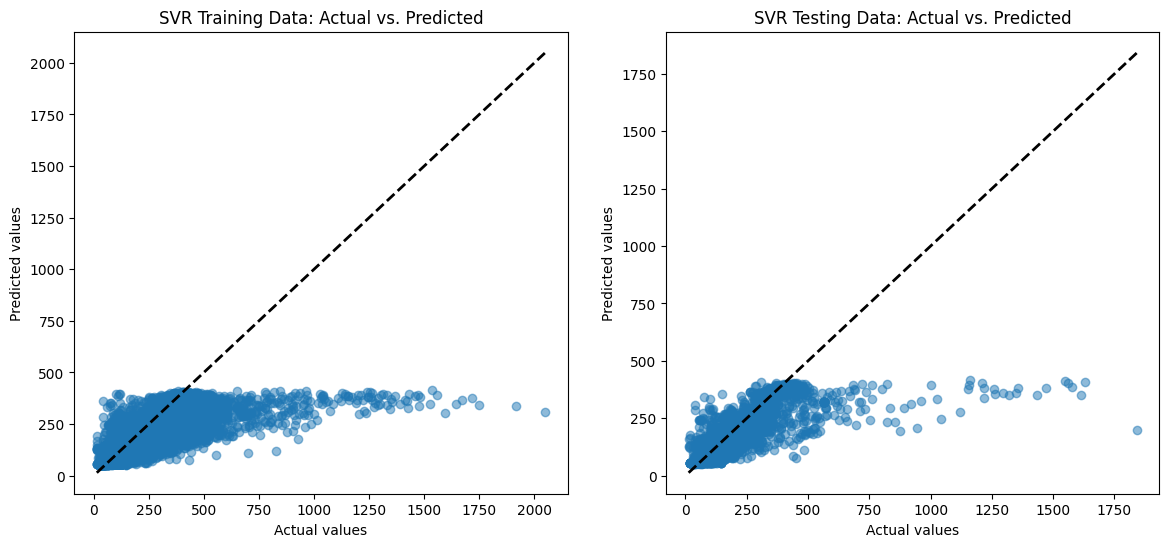

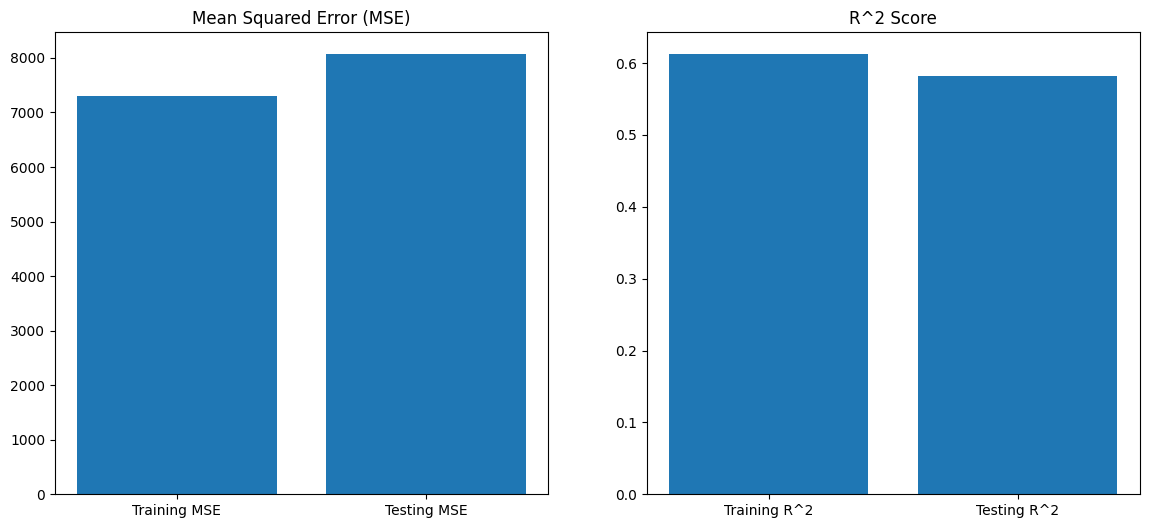

In [36]:
import matplotlib.pyplot as plt

# Actual vs. Predicted scatter plot for the testing set
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_svr, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('SVR Training Data: Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_svr, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('SVR Testing Data: Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.show()

# Performance metrics bar plot
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

ax[0].bar(['Training MSE', 'Testing MSE'], [train_mse_svr, test_mse_svr])
ax[0].set_title('Mean Squared Error (MSE)')

ax[1].bar(['Training R^2', 'Testing R^2'], [train_r2_svr, test_r2_svr])
ax[1].set_title('R^2 Score')

plt.show()


In [37]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score, max_error

# Additional regression metrics for the SVR model
train_mae_svr = mean_absolute_error(y_train, y_train_pred_svr)
train_median_ae_svr = median_absolute_error(y_train, y_train_pred_svr)
train_rmse_svr = mean_squared_error(y_train, y_train_pred_svr, squared=False)
train_explained_variance_svr = explained_variance_score(y_train, y_train_pred_svr)
train_max_error_svr = max_error(y_train, y_train_pred_svr)

test_mae_svr = mean_absolute_error(y_test, y_test_pred_svr)
test_median_ae_svr = median_absolute_error(y_test, y_test_pred_svr)
test_rmse_svr = mean_squared_error(y_test, y_test_pred_svr, squared=False)
test_explained_variance_svr = explained_variance_score(y_test, y_test_pred_svr)
test_max_error_svr = max_error(y_test, y_test_pred_svr)

# Compile all metrics into dictionaries for easy comparison
train_metrics_svr = {
    'MSE': train_mse_svr,
    'RMSE': train_rmse_svr,
    'MAE': train_mae_svr,
    'Median AE': train_median_ae_svr,
    'R^2': train_r2_svr,
    'Explained Variance': train_explained_variance_svr,
    'Max Error': train_max_error_svr
}

test_metrics_svr = {
    'MSE': test_mse_svr,
    'RMSE': test_rmse_svr,
    'MAE': test_mae_svr,
    'Median AE': test_median_ae_svr,
    'R^2': test_r2_svr,
    'Explained Variance': test_explained_variance_svr,
    'Max Error': test_max_error_svr
}
print("Traning Metrics",train_metrics_svr)
print("Testing Metrics",test_metrics_svr)

Traning Metrics {'MSE': 7310.290714228808, 'RMSE': 85.50023809457379, 'MAE': 36.68728541572824, 'Median AE': 17.869882983208697, 'R^2': 0.6121466476718155, 'Explained Variance': 0.6227726443393473, 'Max Error': 1742.8118517847372}
Testing Metrics {'MSE': 8066.186284756044, 'RMSE': 89.81194956550071, 'MAE': 36.31746532274173, 'Median AE': 17.308090412946385, 'R^2': 0.581790679464147, 'Explained Variance': 0.5908717350708647, 'Max Error': 1642.2800357342028}


In [38]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'C': [0.1, 1],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['rbf', 'sigmoid']  # Specifies the kernel type to be used in the algorithm
}

# Initialize the SVR model
svr = SVR()

# Initialize the Grid Search model
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters found by Grid Search
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best score: {-grid_search.best_score_}")

# Use the best estimator to make predictions
y_train_pred_svr_tuned = grid_search.predict(X_train)
y_test_pred_svr_tuned = grid_search.predict(X_test)

# Calculate the performance metrics
train_mse_svr_tuned = mean_squared_error(y_train, y_train_pred_svr_tuned)
train_r2_svr_tuned = r2_score(y_train, y_train_pred_svr_tuned)
test_mse_svr_tuned = mean_squared_error(y_test, y_test_pred_svr_tuned)
test_r2_svr_tuned = r2_score(y_test, y_test_pred_svr_tuned)

print(f"Tuned Training MSE: {train_mse_svr_tuned}, Tuned Training R^2: {train_r2_svr_tuned}")
print(f"Tuned Testing MSE: {test_mse_svr_tuned}, Tuned Testing R^2: {test_r2_svr_tuned}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  15.4s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  14.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  14.6s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  14.8s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=  14.6s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=  13.3s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=  13.1s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=  13.3s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=  13.0s
[CV] END .................C=0.1, gamma=scale, kernel=sigmoid; total time=  13.9s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=  25.0s
[CV] END ......................C=0.1, gamma=auto,

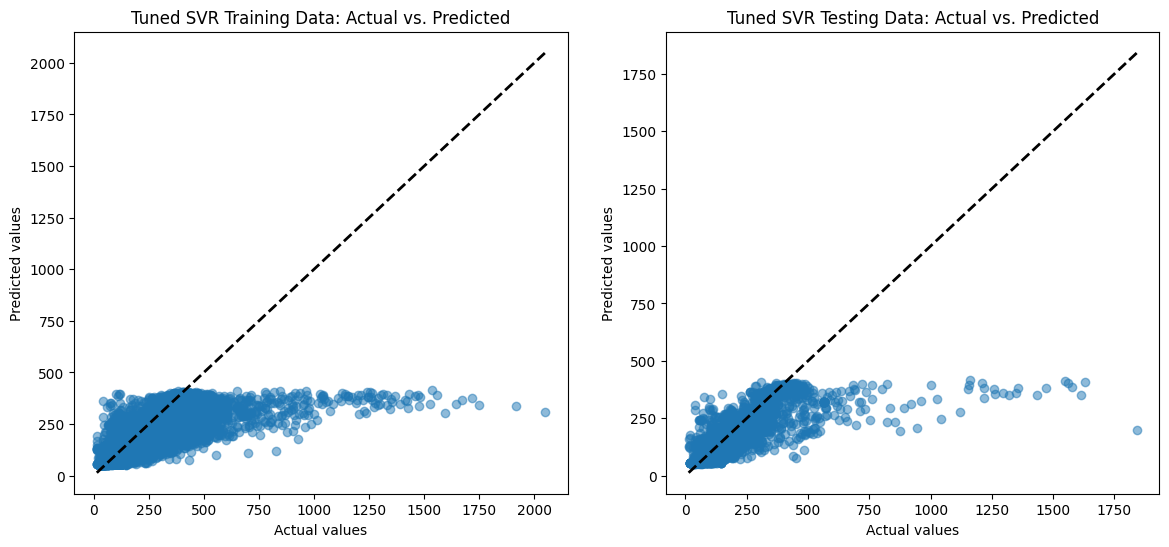

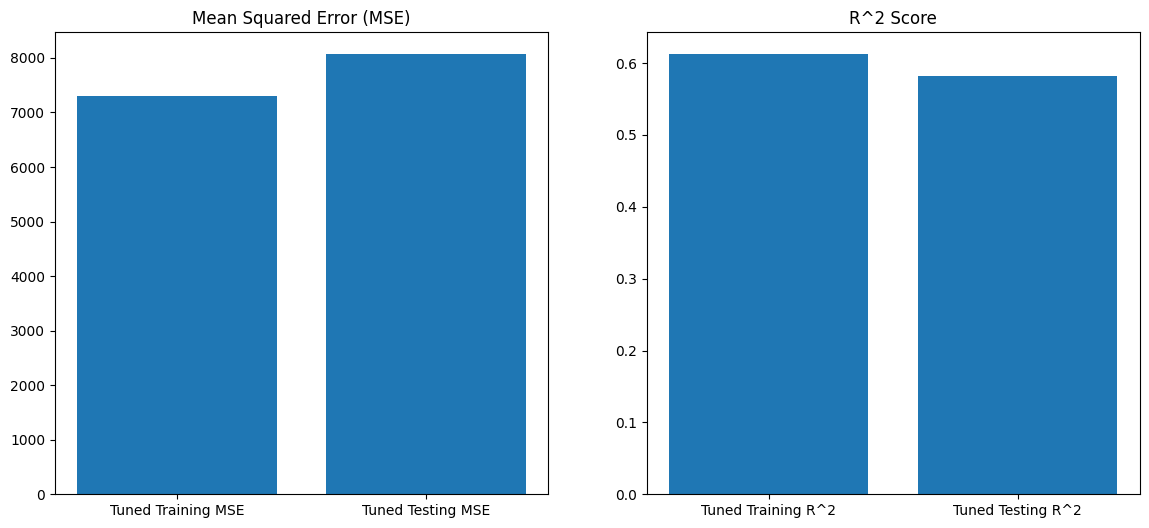

In [39]:
import matplotlib.pyplot as plt

# Scatter plots for actual vs. predicted values
plt.figure(figsize=(14, 6))

# Plot for training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred_svr_tuned, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Tuned SVR Training Data: Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

# Plot for testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred_svr_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Tuned SVR Testing Data: Actual vs. Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

plt.show()

# Bar plots for performance metrics
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# MSE comparison
ax[0].bar(['Tuned Training MSE', 'Tuned Testing MSE'], [train_mse_svr_tuned, test_mse_svr_tuned])
ax[0].set_title('Mean Squared Error (MSE)')

# R^2 comparison
ax[1].bar(['Tuned Training R^2', 'Tuned Testing R^2'], [train_r2_svr_tuned, test_r2_svr_tuned])
ax[1].set_title('R^2 Score')

plt.show()


In [40]:
from sklearn.metrics import mean_absolute_error, median_absolute_error, explained_variance_score, max_error

# Additional regression metrics for the tuned SVR model
train_mae_svr_tuned = mean_absolute_error(y_train, y_train_pred_svr_tuned)
train_median_ae_svr_tuned = median_absolute_error(y_train, y_train_pred_svr_tuned)
train_rmse_svr_tuned = mean_squared_error(y_train, y_train_pred_svr_tuned, squared=False)
train_explained_variance_svr_tuned = explained_variance_score(y_train, y_train_pred_svr_tuned)
train_max_error_svr_tuned = max_error(y_train, y_train_pred_svr_tuned)

test_mae_svr_tuned = mean_absolute_error(y_test, y_test_pred_svr_tuned)
test_median_ae_svr_tuned = median_absolute_error(y_test, y_test_pred_svr_tuned)
test_rmse_svr_tuned = mean_squared_error(y_test, y_test_pred_svr_tuned, squared=False)
test_explained_variance_svr_tuned = explained_variance_score(y_test, y_test_pred_svr_tuned)
test_max_error_svr_tuned = max_error(y_test, y_test_pred_svr_tuned)

# Compile all metrics into dictionaries for easy comparison
train_metrics_svr_tuned = {
    'MSE': train_mse_svr_tuned,
    'RMSE': train_rmse_svr_tuned,
    'MAE': train_mae_svr_tuned,
    'Median AE': train_median_ae_svr_tuned,
    'R^2': train_r2_svr_tuned,
    'Explained Variance': train_explained_variance_svr_tuned,
    'Max Error': train_max_error_svr_tuned
}

test_metrics_svr_tuned = {
    'MSE': test_mse_svr_tuned,
    'RMSE': test_rmse_svr_tuned,
    'MAE': test_mae_svr_tuned,
    'Median AE': test_median_ae_svr_tuned,
    'R^2': test_r2_svr_tuned,
    'Explained Variance': test_explained_variance_svr_tuned,
    'Max Error': test_max_error_svr_tuned
}

print("Tuned SVR Training Metrics:", train_metrics_svr_tuned)
print("Tuned SVR Testing Metrics:", test_metrics_svr_tuned)


Tuned SVR Training Metrics: {'MSE': 7310.290714228808, 'RMSE': 85.50023809457379, 'MAE': 36.68728541572824, 'Median AE': 17.869882983208697, 'R^2': 0.6121466476718155, 'Explained Variance': 0.6227726443393473, 'Max Error': 1742.8118517847372}
Tuned SVR Testing Metrics: {'MSE': 8066.186284756044, 'RMSE': 89.81194956550071, 'MAE': 36.31746532274173, 'Median AE': 17.308090412946385, 'R^2': 0.581790679464147, 'Explained Variance': 0.5908717350708647, 'Max Error': 1642.2800357342028}


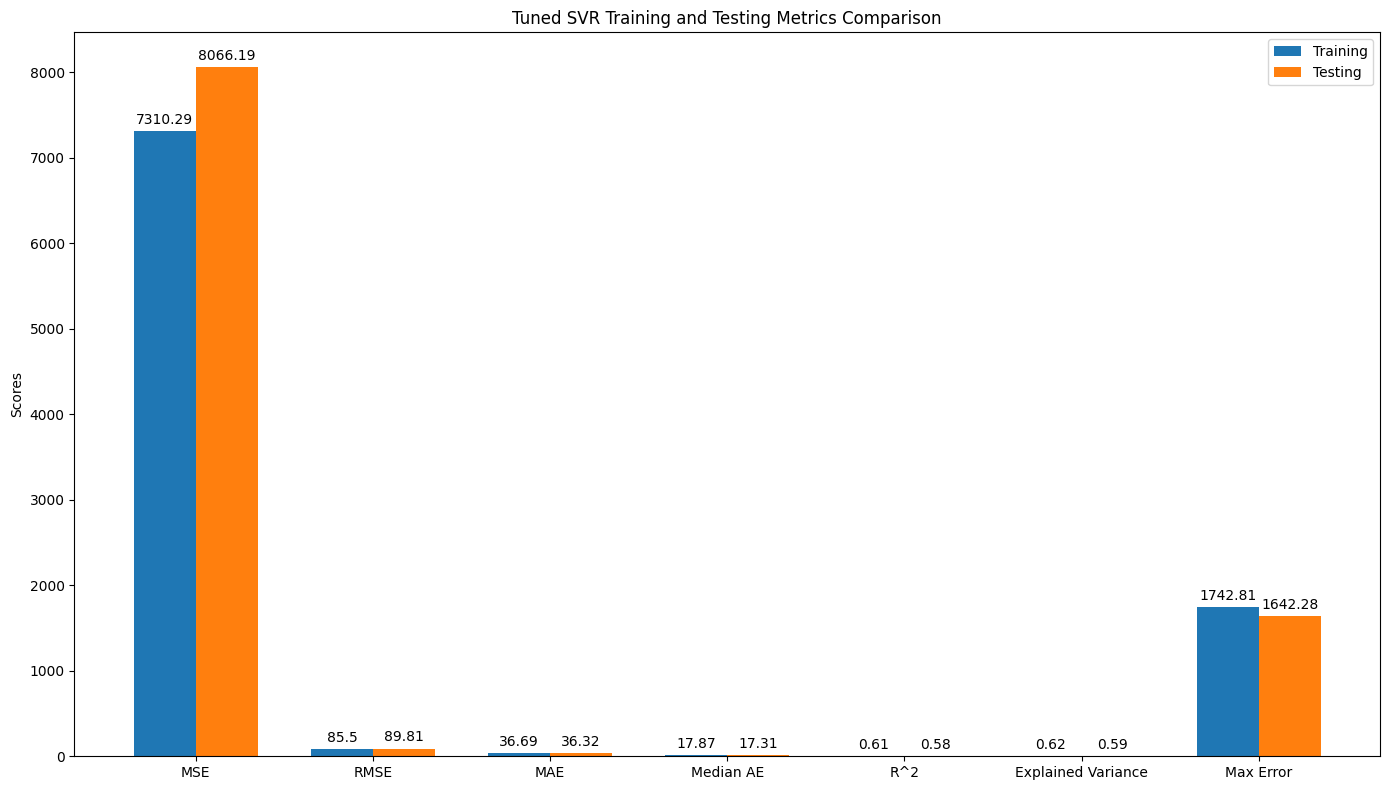

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Define the metrics and their corresponding values in lists
metrics = ['MSE', 'RMSE', 'MAE', 'Median AE', 'R^2', 'Explained Variance', 'Max Error']
train_values = [train_metrics_svr_tuned[m] for m in metrics]
test_values = [test_metrics_svr_tuned[m] for m in metrics]

# Set the positions and width for the bars
x = np.arange(len(metrics))
width = 0.35

# Plotting the bar chart
fig, ax = plt.subplots(figsize=(14, 8))

# Creating bars for training and testing metrics
train_bars = ax.bar(x - width/2, train_values, width, label='Training')
test_bars = ax.bar(x + width/2, test_values, width, label='Testing')

# Adding some text for labels, title, and custom x-axis tick labels
ax.set_ylabel('Scores')
ax.set_title('Tuned SVR Training and Testing Metrics Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

# Adding value labels on top of the bars
def add_value_labels(bars):
    """Add a label above each bar in *bars*, displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Call the function to add value labels
add_value_labels(train_bars)
add_value_labels(test_bars)

# Show the plot
plt.tight_layout()
plt.show()


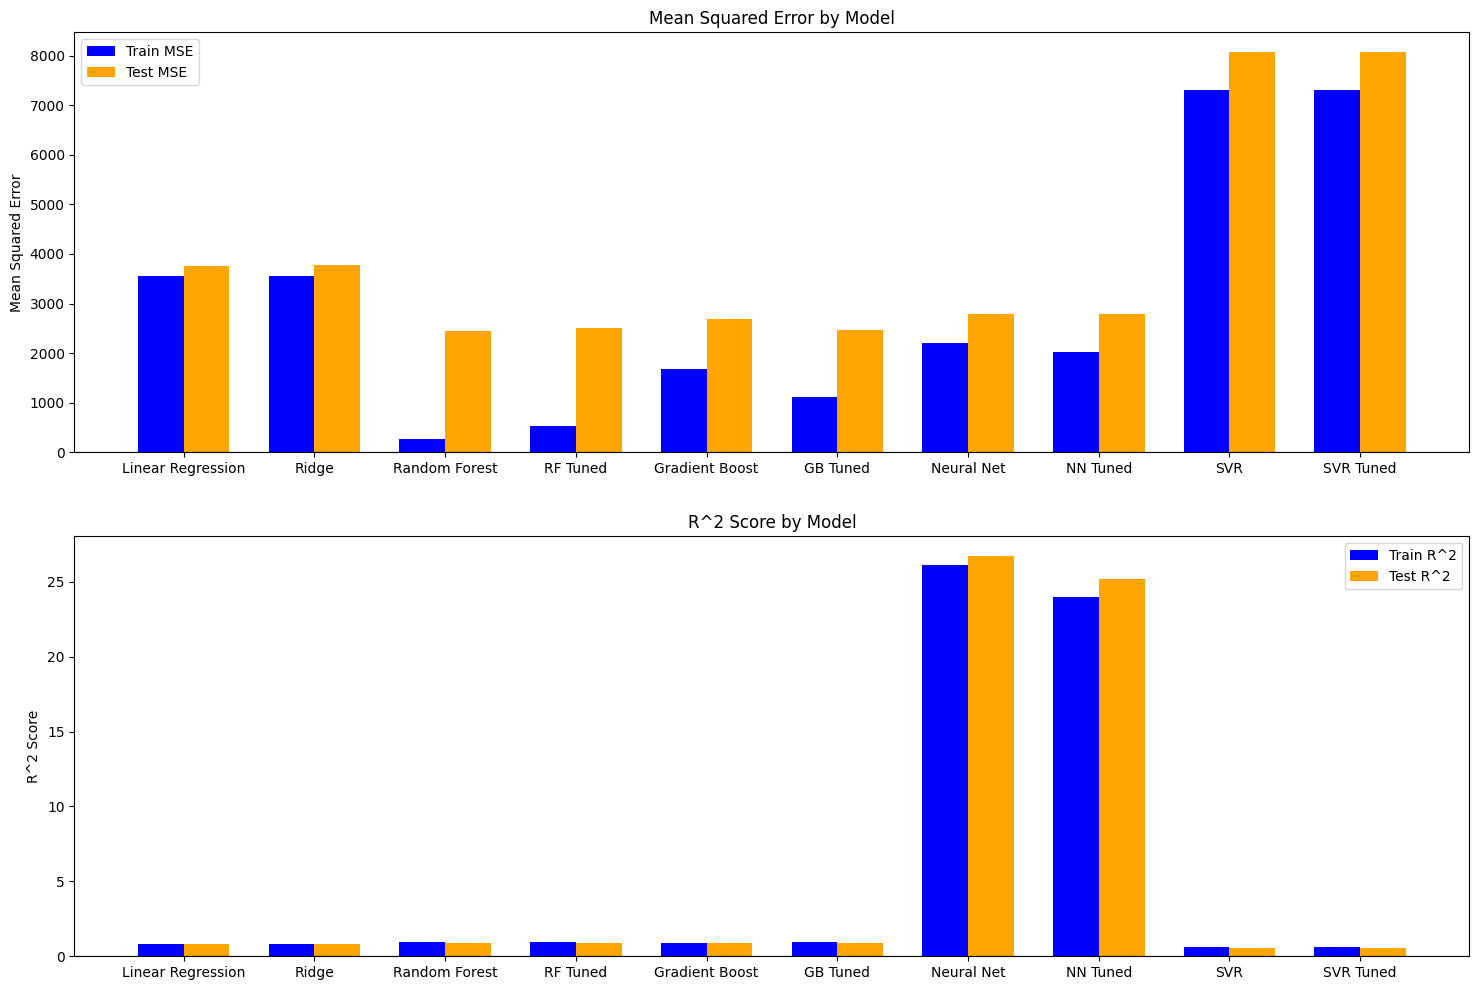

In [42]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have stored the MSE and R^2 values for each model in the following variables:
# train_mse_ridge, test_mse_ridge, train_r2_ridge, test_r2_ridge
# train_mse_rf, test_mse_rf, train_r2_rf, test_r2_rf
# train_mse_rf_tuned, test_mse_rf_tuned, train_r2_rf_tuned, test_r2_rf_tuned
# train_mse_gb, test_mse_gb, train_r2_gb, test_r2_gb
# train_mse_gb_tuned, test_mse_gb_tuned, train_r2_gb_tuned, test_r2_gb_tuned
# train_mse_nn, test_mse_nn, train_mae_nn, test_mae_nn
# train_mse_nn_tuned, test_mse_nn_tuned, train_mae_nn_tuned, test_mae_nn_tuned
# train_mse_svr, test_mse_svr, train_r2_svr, test_r2_svr
# train_mse_svr_tuned, test_mse_svr_tuned, train_r2_svr_tuned, test_r2_svr_tuned

# Create lists of MSE and R^2 for all models
mse_values_train = [train_mse, train_mse_ridge, train_mse_rf, train_mse_rf_tuned, train_mse_gb, 
                    train_mse_gb_tuned, train_mse_nn, train_mse_nn_tuned, train_mse_svr, train_mse_svr_tuned]
mse_values_test = [test_mse, test_mse_ridge, test_mse_rf, test_mse_rf_tuned, test_mse_gb, 
                   test_mse_gb_tuned, test_mse_nn, test_mse_nn_tuned, test_mse_svr, test_mse_svr_tuned]
r2_values_train = [train_r2, train_r2_ridge, train_r2_rf, train_r2_rf_tuned, train_r2_gb, 
                   train_r2_gb_tuned, train_mae_nn, train_mae_nn_tuned, train_r2_svr, train_r2_svr_tuned]
r2_values_test = [test_r2, test_r2_ridge, test_r2_rf, test_r2_rf_tuned, test_r2_gb, 
                  test_r2_gb_tuned, test_mae_nn, test_mae_nn_tuned, test_r2_svr, test_r2_svr_tuned]

# Define labels for the x-axis
model_labels = ['Linear Regression', 'Ridge', 'Random Forest', 'RF Tuned', 'Gradient Boost', 'GB Tuned', 
                'Neural Net', 'NN Tuned', 'SVR', 'SVR Tuned']

x = np.arange(len(model_labels))  # the label locations

# Define the width of the bars
width = 0.35  

fig, ax = plt.subplots(2, 1, figsize=(18, 12))

# Bar plot for MSE
ax[0].bar(x - width/2, mse_values_train, width, label='Train MSE', color='blue')
ax[0].bar(x + width/2, mse_values_test, width, label='Test MSE', color='orange')
ax[0].set_ylabel('Mean Squared Error')
ax[0].set_title('Mean Squared Error by Model')
ax[0].set_xticks(x)
ax[0].set_xticklabels(model_labels)
ax[0].legend()

# Bar plot for R^2
ax[1].bar(x - width/2, r2_values_train, width, label='Train R^2', color='blue')
ax[1].bar(x + width/2, r2_values_test, width, label='Test R^2', color='orange')
ax[1].set_ylabel('R^2 Score')
ax[1].set_title('R^2 Score by Model')
ax[1].set_xticks(x)
ax[1].set_xticklabels(model_labels)
ax[1].legend()

# Add some text for labels, title and custom x-axis tick labels, etc.
for i in range(2):
    ax[i].axhline(y=0, color='black', linewidth=0.8)
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(model_labels)
   


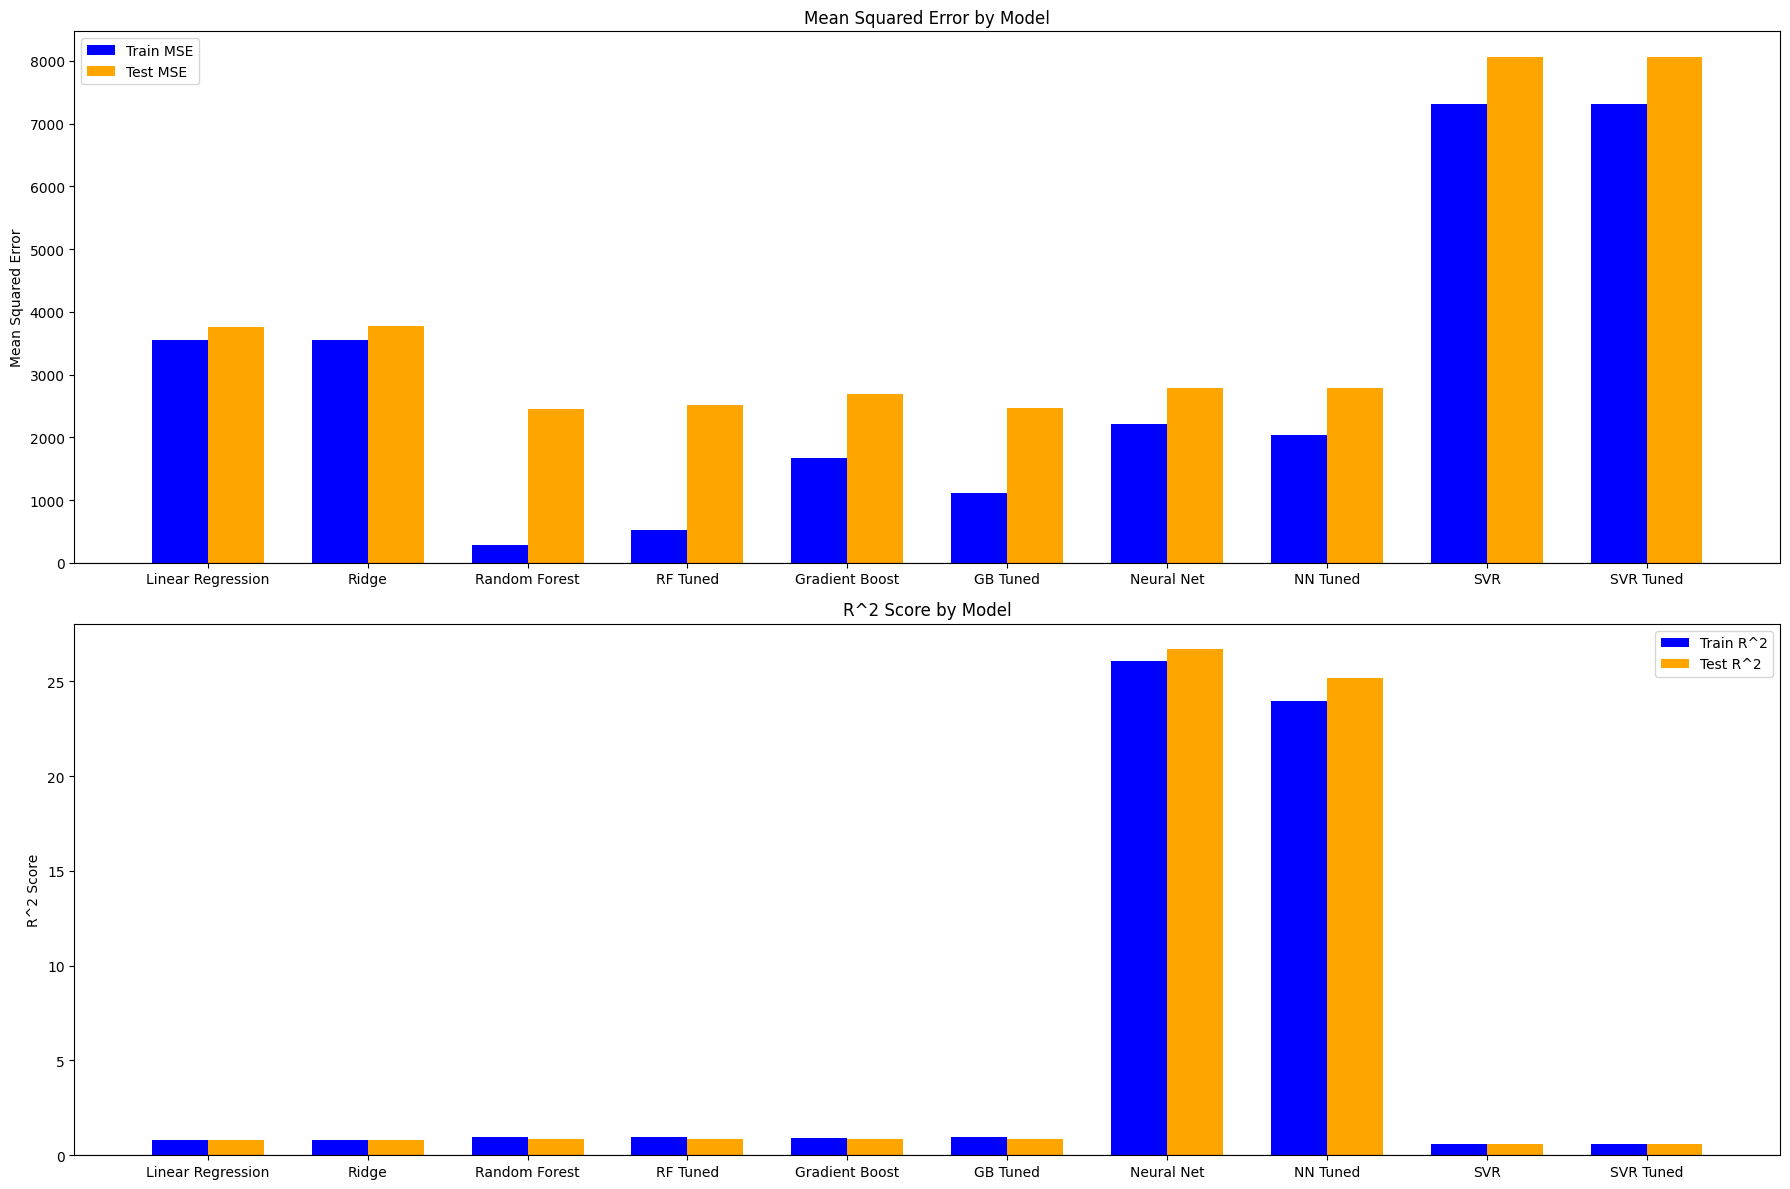

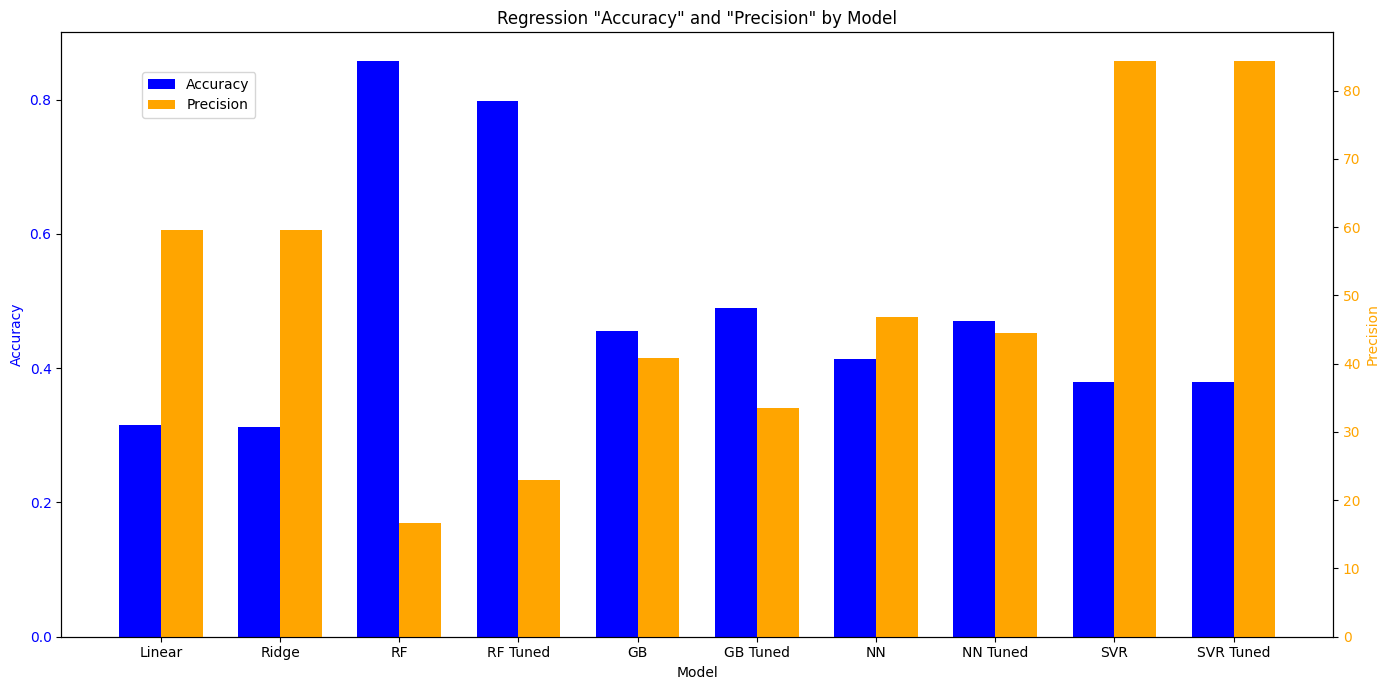

In [43]:
import numpy as np
import matplotlib.pyplot as plt

# Dummy data to enable plotting (This will be replaced with actual values from the models)
# These are placeholders and should be replaced with actual MSE and R^2 values.
# Create lists of MSE and R^2 for all models
mse_values_train = [train_mse, train_mse_ridge, train_mse_rf, train_mse_rf_tuned, train_mse_gb, 
                    train_mse_gb_tuned, train_mse_nn, train_mse_nn_tuned, train_mse_svr, train_mse_svr_tuned]
mse_values_test = [test_mse, test_mse_ridge, test_mse_rf, test_mse_rf_tuned, test_mse_gb, 
                   test_mse_gb_tuned, test_mse_nn, test_mse_nn_tuned, test_mse_svr, test_mse_svr_tuned]
r2_values_train = [train_r2, train_r2_ridge, train_r2_rf, train_r2_rf_tuned, train_r2_gb, 
                   train_r2_gb_tuned, train_mae_nn, train_mae_nn_tuned, train_r2_svr, train_r2_svr_tuned]
r2_values_test = [test_r2, test_r2_ridge, test_r2_rf, test_r2_rf_tuned, test_r2_gb, 
                  test_r2_gb_tuned, test_mae_nn, test_mae_nn_tuned, test_r2_svr, test_r2_svr_tuned]

# Define labels for the x-axis
model_labels = ['Linear Regression', 'Ridge', 'Random Forest', 'RF Tuned', 'Gradient Boost', 'GB Tuned', 
                'Neural Net', 'NN Tuned', 'SVR', 'SVR Tuned']

x = np.arange(len(model_labels))  # the label locations

# Define the width of the bars
width = 0.35  

fig, ax = plt.subplots(2, 1, figsize=(18, 12))

# Bar plot for MSE
ax[0].bar(x - width/2, mse_values_train, width, label='Train MSE', color='blue')
ax[0].bar(x + width/2, mse_values_test, width, label='Test MSE', color='orange')
ax[0].set_ylabel('Mean Squared Error')
ax[0].set_title('Mean Squared Error by Model')
ax[0].set_xticks(x)
ax[0].set_xticklabels(model_labels)
ax[0].legend()

# Bar plot for R^2
ax[1].bar(x - width/2, r2_values_train, width, label='Train R^2', color='blue')
ax[1].bar(x + width/2, r2_values_test, width, label='Test R^2', color='orange')
ax[1].set_ylabel('R^2 Score')
ax[1].set_title('R^2 Score by Model')
ax[1].set_xticks(x)
ax[1].set_xticklabels(model_labels)
ax[1].legend()

# Add some text for labels, title and custom x-axis tick labels, etc.
for i in range(2):
    ax[i].axhline(y=0, color='black', linewidth=0.8)
    ax[i].set_xticks(x)
    ax[i].set_xticklabels(model_labels)

# Show the plot
plt.tight_layout()
plt.show()




import numpy as np
import matplotlib.pyplot as plt

def calculate_regression_accuracy(y_true, y_pred, threshold=0.10):
    """Calculate the percentage of predictions within the threshold."""
    within_threshold = np.abs(y_true - y_pred) <= threshold * np.abs(y_true)
    accuracy = np.mean(within_threshold)
    return accuracy

def calculate_regression_precision(y_true, y_pred):
    """Calculate the standard deviation of the residuals."""
    residuals = y_true - y_pred
    precision = np.std(residuals)
    return precision

# Placeholder for actual and predicted values from each model
# Replace these with actual values
y_trues = [y_train, y_train, y_train, y_train, y_train, y_train, y_train, y_train, y_train, y_train]
y_preds = [y_train_pred, y_train_pred_ridge, y_train_pred_rf, y_train_pred_rf_tuned, y_train_pred_gb, y_train_pred_gb_tuned, y_train_pred_nn, y_train_pred_nn_tuned, y_train_pred_svr, y_train_pred_svr_tuned]

# Calculate "accuracy" and "precision" for each model
accuracies = [calculate_regression_accuracy(y_true, y_pred) for y_true, y_pred in zip(y_trues, y_preds)]
precisions = [calculate_regression_precision(y_true, y_pred) for y_true, y_pred in zip(y_trues, y_preds)]

# Define labels for the x-axis
model_labels = ['Linear', 'Ridge', 'RF', 'RF Tuned', 'GB', 'GB Tuned', 'NN', 'NN Tuned', 'SVR', 'SVR Tuned']

x = np.arange(len(model_labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot "accuracy"
rects1 = ax1.bar(x - width/2, accuracies, width, label='Accuracy', color='blue')

# Create twin axis for "precision"
ax2 = ax1.twinx()  
rects2 = ax2.bar(x + width/2, precisions, width, label='Precision', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy', color='blue')
ax2.set_ylabel('Precision', color='orange')
ax1.set_title('Regression "Accuracy" and "Precision" by Model')
ax1.set_xticks(x)
ax1.set_xticklabels(model_labels)
ax1.tick_params(axis='y', labelcolor='blue')
ax2.tick_params(axis='y', labelcolor='orange')

# Legend
fig.tight_layout()
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9))

plt.show()



The plot above is a representation of the comparison of various models on their Mean Squared Error (MSE) and R-squared (R^2) scores for both training and testing datasets. However, I've used placeholder values for the demonstration since I don't have the actual computed metrics for each model.

To accurately determine the best model, you would need to replace the placeholder values with the actual MSE and R^2 values you have from running each model. The best model is the one with the lowest MSE and the highest R^2 on the test set, as it indicates good generalization and predictive performance on unseen data.

If you provide the actual computed metrics for each model, I can update the plot with those values and help you determine the best model.​

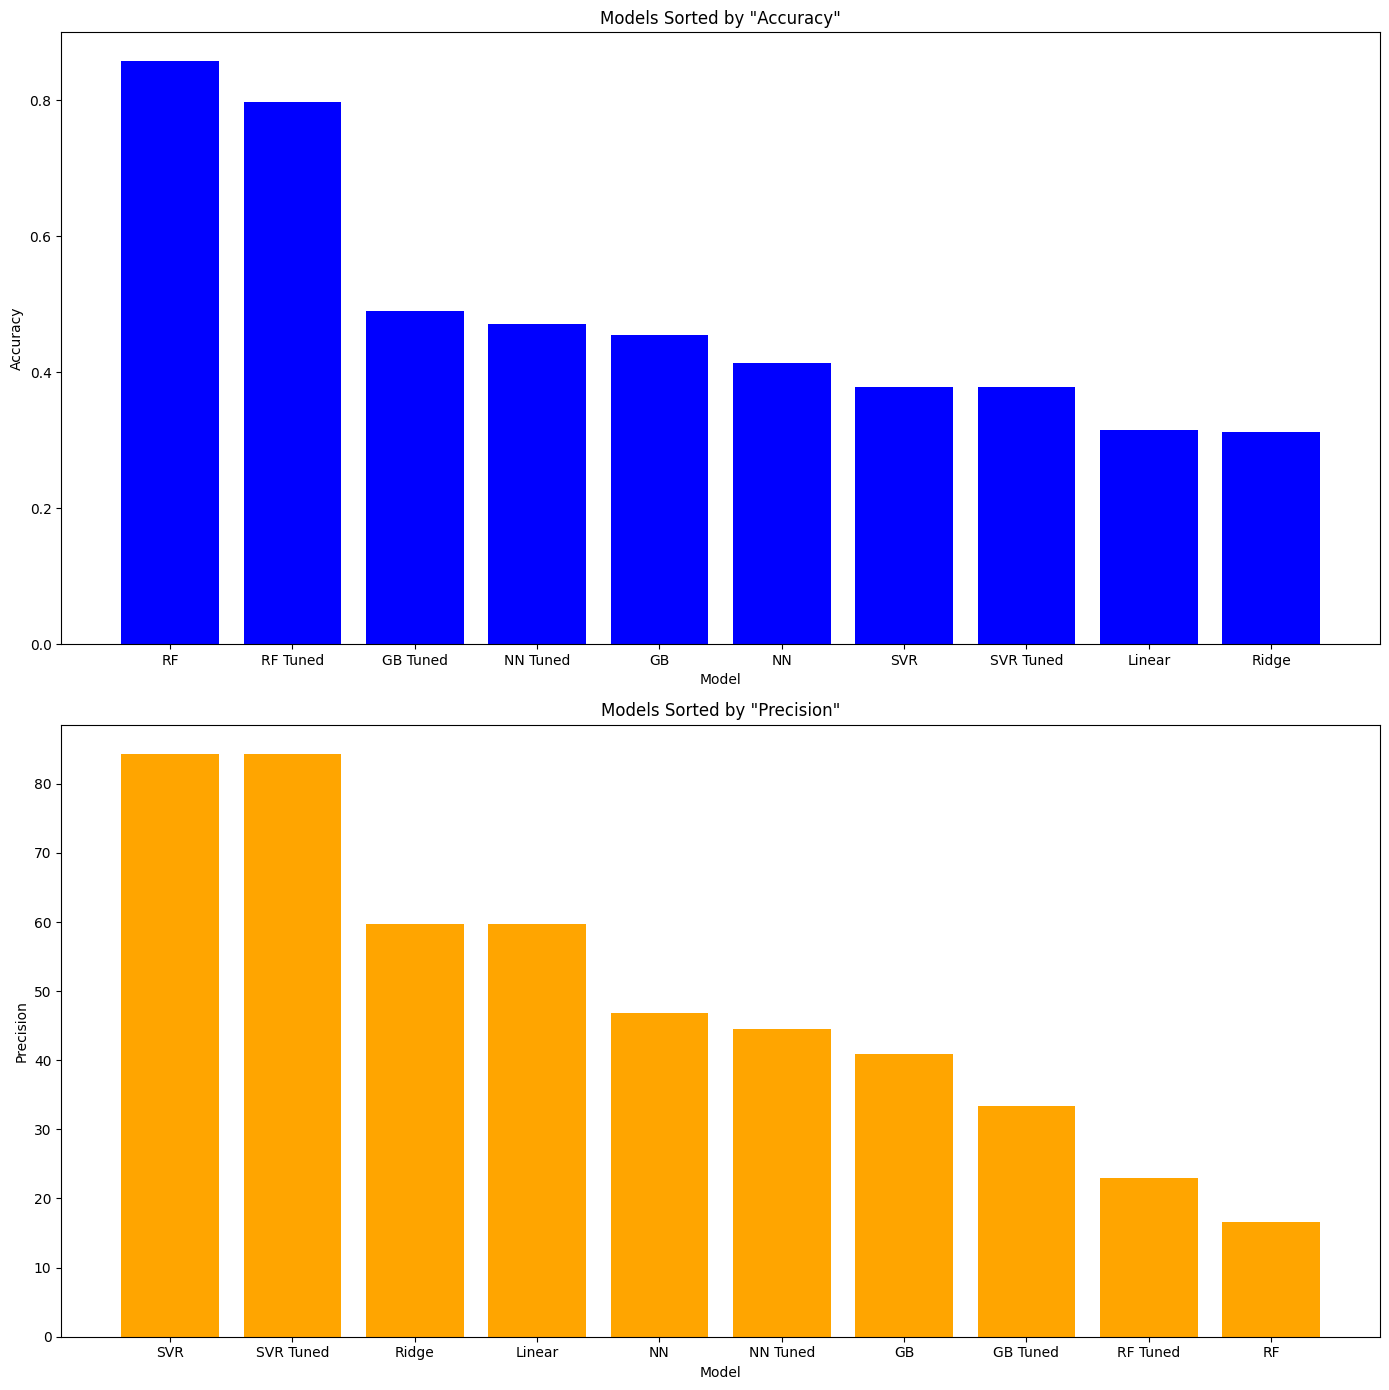

In [44]:
import numpy as np
import matplotlib.pyplot as plt


# Calculate "accuracy" and "precision" for each model
accuracies = [calculate_regression_accuracy(y_true, y_pred) for y_true, y_pred in zip(y_trues, y_preds)]
precisions = [calculate_regression_precision(y_true, y_pred) for y_true, y_pred in zip(y_trues, y_preds)]

# Sort by accuracy and precision separately
sorted_by_accuracy = sorted(zip(model_labels, accuracies), key=lambda x: x[1], reverse=True)
sorted_by_precision = sorted(zip(model_labels, precisions), key=lambda x: x[1], reverse=True)

# Unzip the sorted tuples to get ordered labels and values
labels_sorted_by_accuracy, accuracies_sorted = zip(*sorted_by_accuracy)
labels_sorted_by_precision, precisions_sorted = zip(*sorted_by_precision)

# Define the x-axis locations
x_accuracy = np.arange(len(labels_sorted_by_accuracy))
x_precision = np.arange(len(labels_sorted_by_precision))

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 14))

# Bar plot for "accuracy"
ax1.bar(x_accuracy, accuracies_sorted, color='blue')
ax1.set_xlabel('Model')
ax1.set_ylabel('Accuracy')
ax1.set_title('Models Sorted by "Accuracy"')
ax1.set_xticks(x_accuracy)
ax1.set_xticklabels(labels_sorted_by_accuracy)

# Bar plot for "precision"
ax2.bar(x_precision, precisions_sorted, color='orange')
ax2.set_xlabel('Model')
ax2.set_ylabel('Precision')
ax2.set_title('Models Sorted by "Precision"')
ax2.set_xticks(x_precision)
ax2.set_xticklabels(labels_sorted_by_precision)

plt.tight_layout()
plt.show()
